# 1. Loading libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold, GridSearchCV, RandomizedSearchCV, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.metrics import (accuracy_score,
                             f1_score,
                             precision_score,
                             recall_score,
                             RocCurveDisplay,
                             precision_recall_curve,
                             average_precision_score,
                             roc_auc_score,
                             roc_curve, auc,
                             classification_report,
                             confusion_matrix)
import plotly.express as px
import plotly.graph_objs as go
from sklearn.feature_selection import RFECV
from xgboost import XGBClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('credit.csv')

# 2. Undertanding the data: Exploratory Data Analysis [EDA]

In [3]:
df.head()

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
0,< 0 DM,6,critical,furniture/appliances,1169,unknown,> 7 years,4,4,67,none,own,2,skilled,1,yes,no
1,1 - 200 DM,48,good,furniture/appliances,5951,< 100 DM,1 - 4 years,2,2,22,none,own,1,skilled,1,no,yes
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 years,2,3,49,none,own,1,unskilled,2,no,no
3,< 0 DM,42,good,furniture/appliances,7882,< 100 DM,4 - 7 years,2,4,45,none,other,1,skilled,2,no,no
4,< 0 DM,24,poor,car,4870,< 100 DM,1 - 4 years,3,4,53,none,other,2,skilled,2,no,yes


In [4]:
numerical_features = ['months_loan_duration', 'amount', 'percent_of_income', 'years_at_residence', 'age','existing_loans_count','dependents']

categorical_features = ['checking_balance', 'credit_history', 'purpose', 'savings_balance',
                        'employment_duration', 'other_credit', 'housing', 'job', 'phone']

In [5]:
df.describe()

,months_loan_duration,amount,percent_of_income,years_at_residence,age,existing_loans_count,dependents
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   checking_balance      1000 non-null   object
 1   months_loan_duration  1000 non-null   int64 
 2   credit_history        1000 non-null   object
 3   purpose               1000 non-null   object
 4   amount                1000 non-null   int64 
 5   savings_balance       1000 non-null   object
 6   employment_duration   1000 non-null   object
 7   percent_of_income     1000 non-null   int64 
 8   years_at_residence    1000 non-null   int64 
 9   age                   1000 non-null   int64 
 10  other_credit          1000 non-null   object
 11  housing               1000 non-null   object
 12  existing_loans_count  1000 non-null   int64 
 13  job                   1000 non-null   object
 14  dependents            1000 non-null   int64 
 15  phone                 1000 non-null   o

In [7]:
for column in df.columns:
    if column not in ('amount', 'age','months_loan_duration'):
        print(f"Unique values in '{column}': {df[column].unique()}")

Unique values in 'checking_balance': ['< 0 DM' '1 - 200 DM' 'unknown' '> 200 DM']
Unique values in 'credit_history': ['critical' 'good' 'poor' 'perfect' 'very good']
Unique values in 'purpose': ['furniture/appliances' 'education' 'car' 'business' 'renovations' 'car0']
Unique values in 'savings_balance': ['unknown' '< 100 DM' '500 - 1000 DM' '> 1000 DM' '100 - 500 DM']
Unique values in 'employment_duration': ['> 7 years' '1 - 4 years' '4 - 7 years' 'unemployed' '< 1 year']
Unique values in 'percent_of_income': [4 2 3 1]
Unique values in 'years_at_residence': [4 2 3 1]
Unique values in 'other_credit': ['none' 'bank' 'store']
Unique values in 'housing': ['own' 'other' 'rent']
Unique values in 'existing_loans_count': [2 1 3 4]
Unique values in 'job': ['skilled' 'unskilled' 'management' 'unemployed']
Unique values in 'dependents': [1 2]
Unique values in 'phone': ['yes' 'no']
Unique values in 'default': ['no' 'yes']


In [8]:
for feature in categorical_features:
    print(df[feature].value_counts())
    print("~"*50)

checking_balance
unknown       394
< 0 DM        274
1 - 200 DM    269
> 200 DM       63
Name: count, dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
credit_history
good         530
critical     293
poor          88
very good     49
perfect       40
Name: count, dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
purpose
furniture/appliances    473
car                     337
business                 97
education                59
renovations              22
car0                     12
Name: count, dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
savings_balance
< 100 DM         603
unknown          183
100 - 500 DM     103
500 - 1000 DM     63
> 1000 DM         48
Name: count, dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
employment_duration
1 - 4 years    339
> 7 years      253
4 - 7 years    174
< 1 year       172
unemployed      62
Name: count, dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
other_credit
n

In [9]:
df['default'].value_counts()

,count
default,
no,700
yes,300


# 3. Visualization

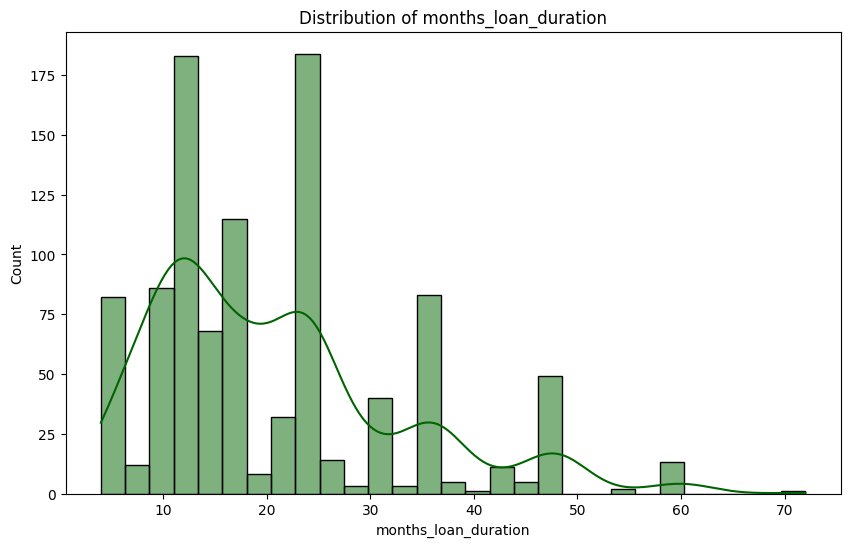

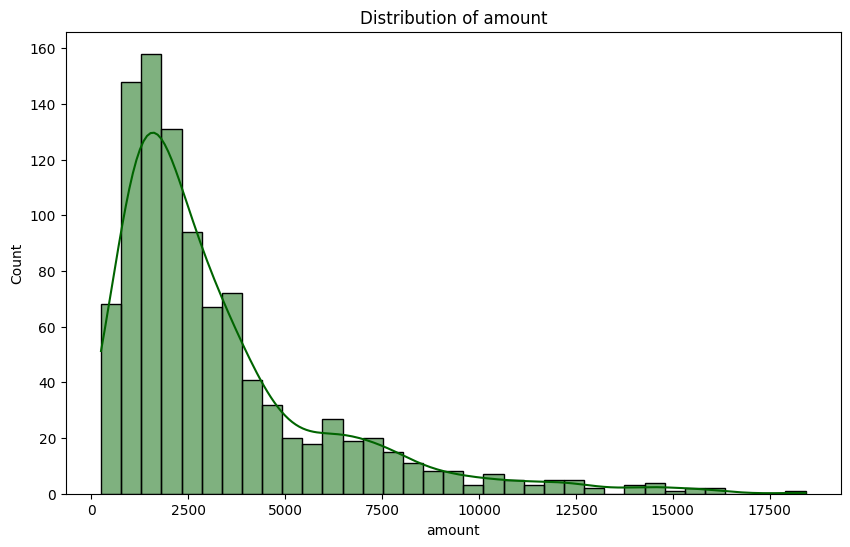

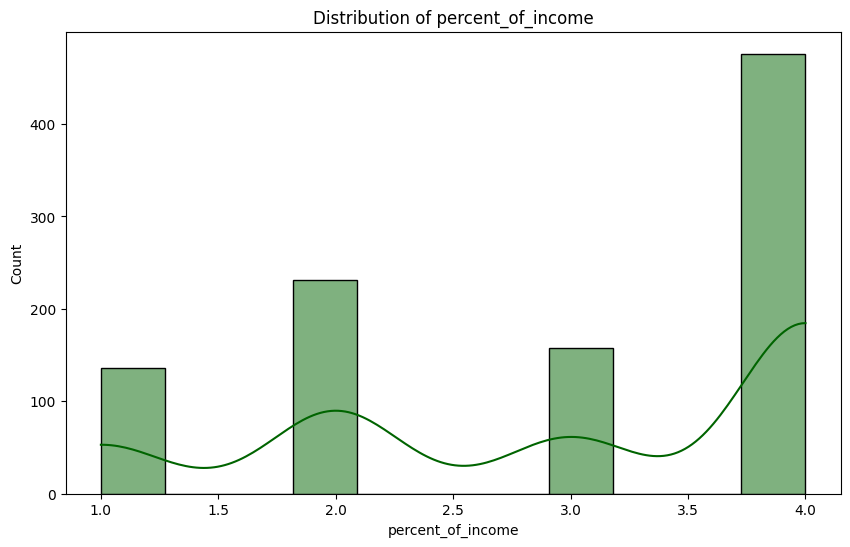

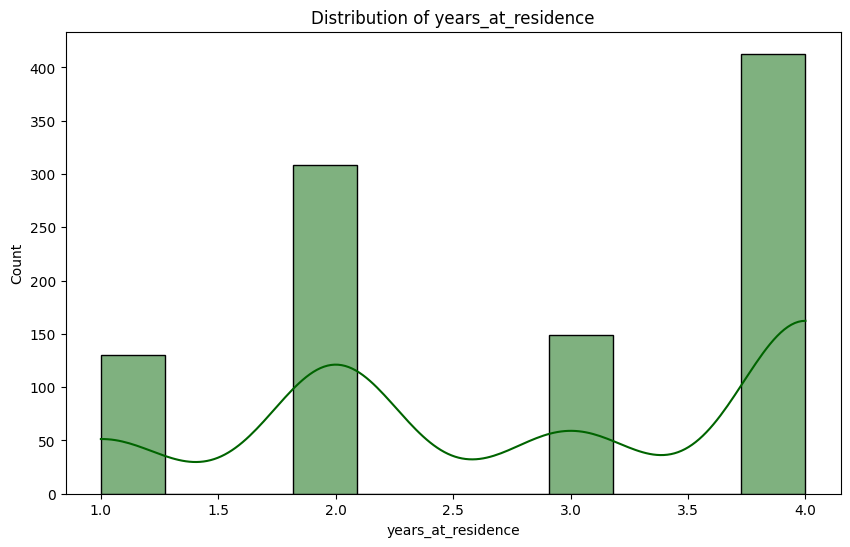

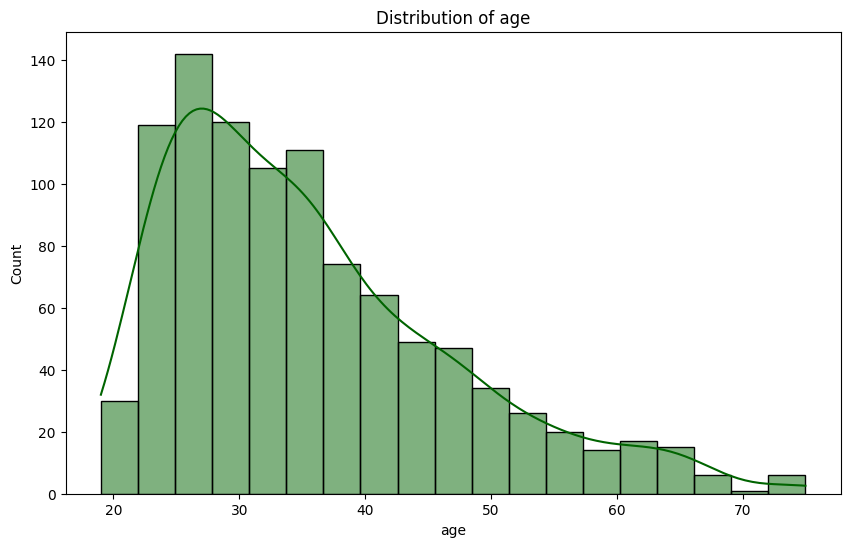

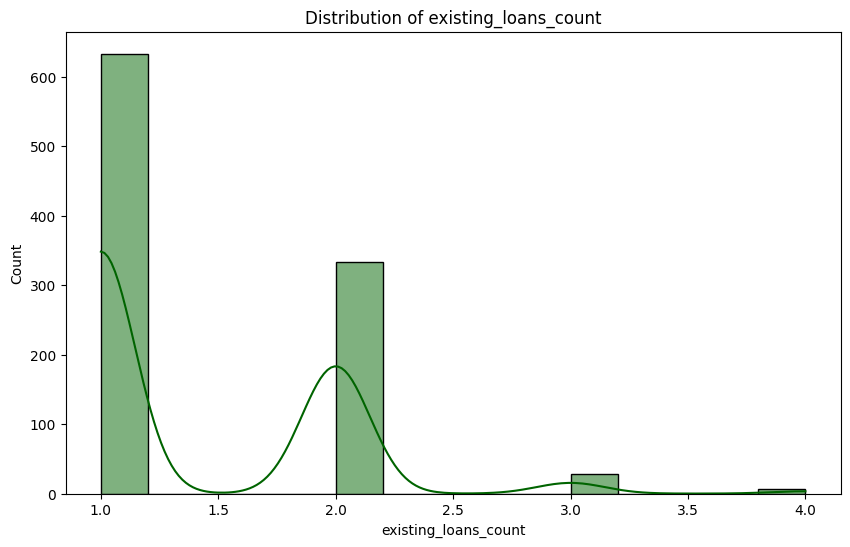

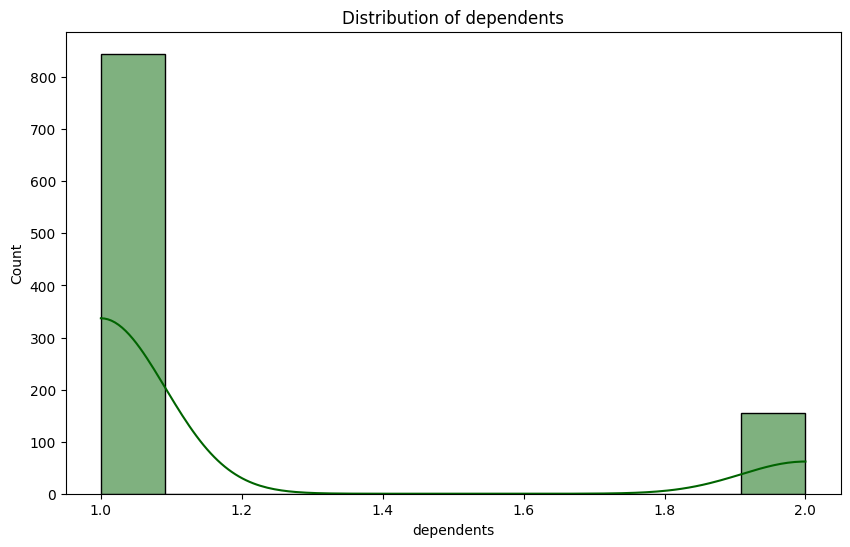

In [ ]:
# KDE + Histogram for each numerical feature
for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[feature], kde=True, color='darkgreen')
    plt.title(f'Distribution of {feature}')
    plt.show()

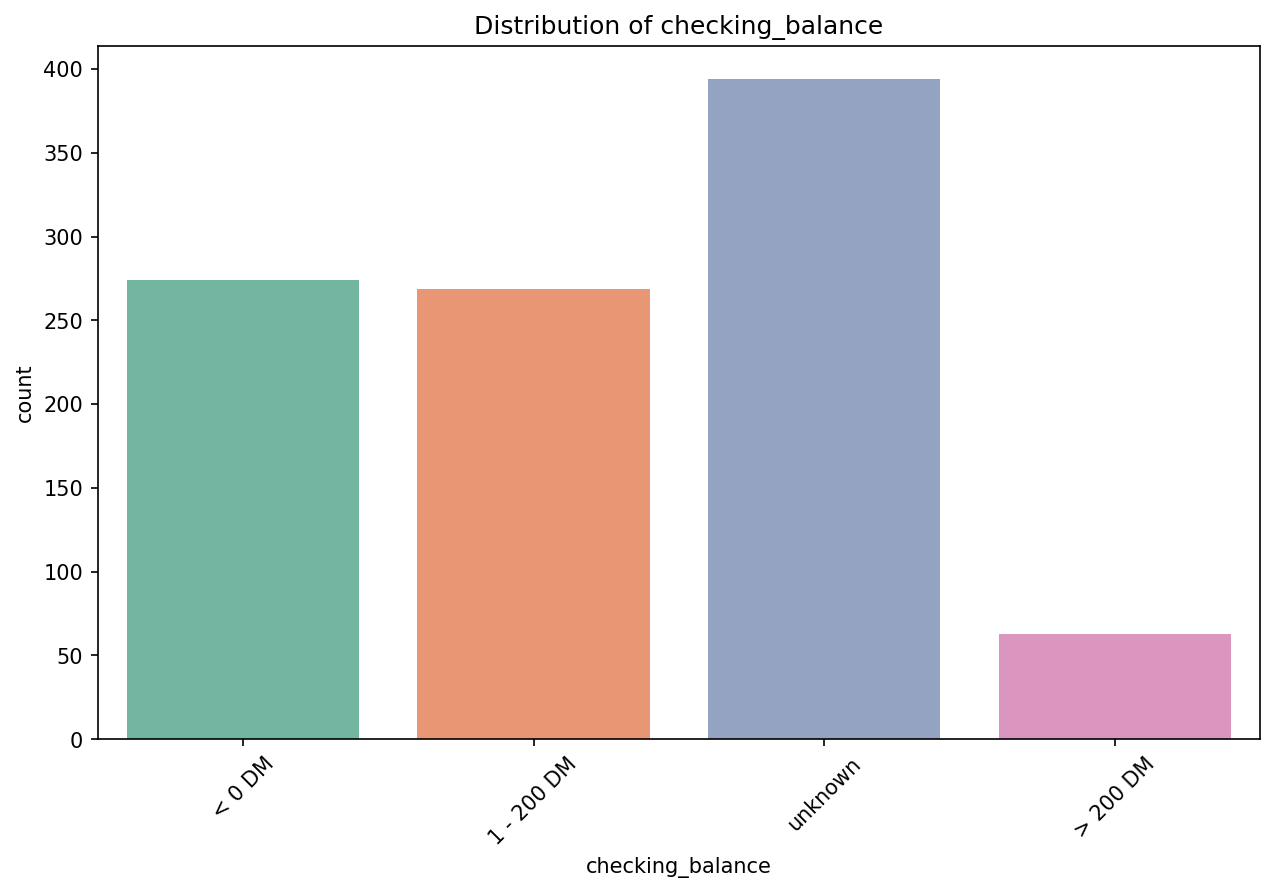

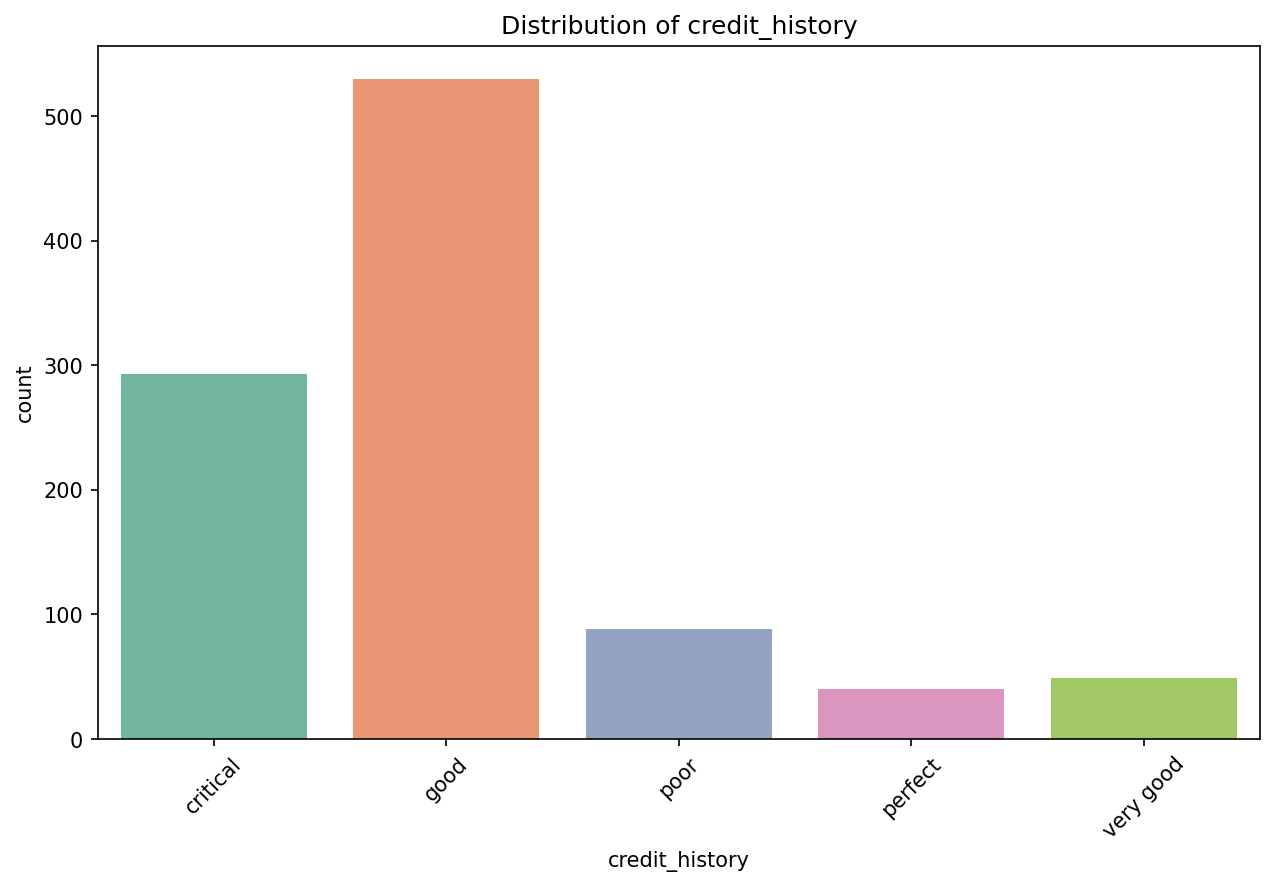

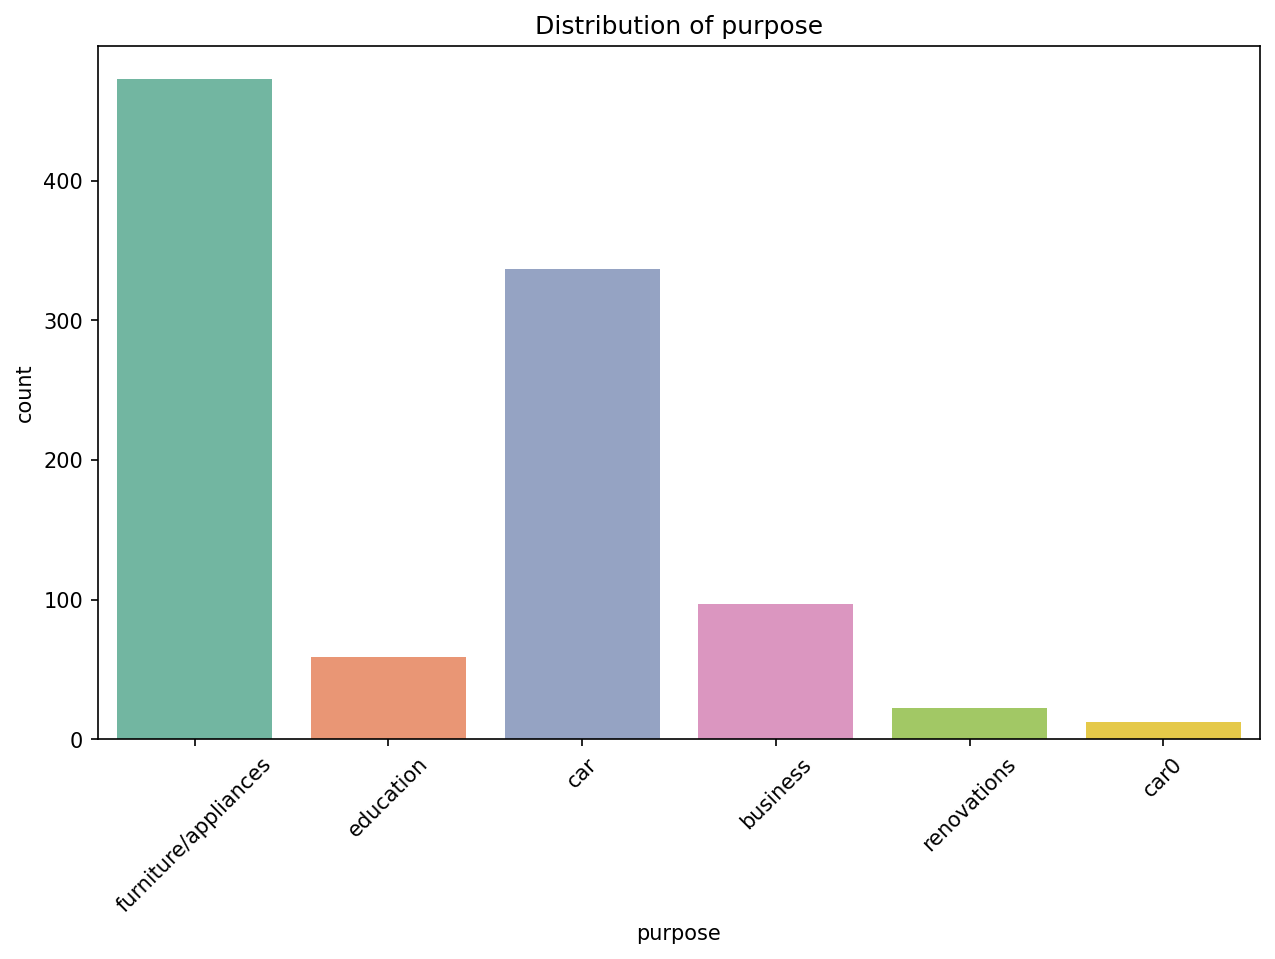

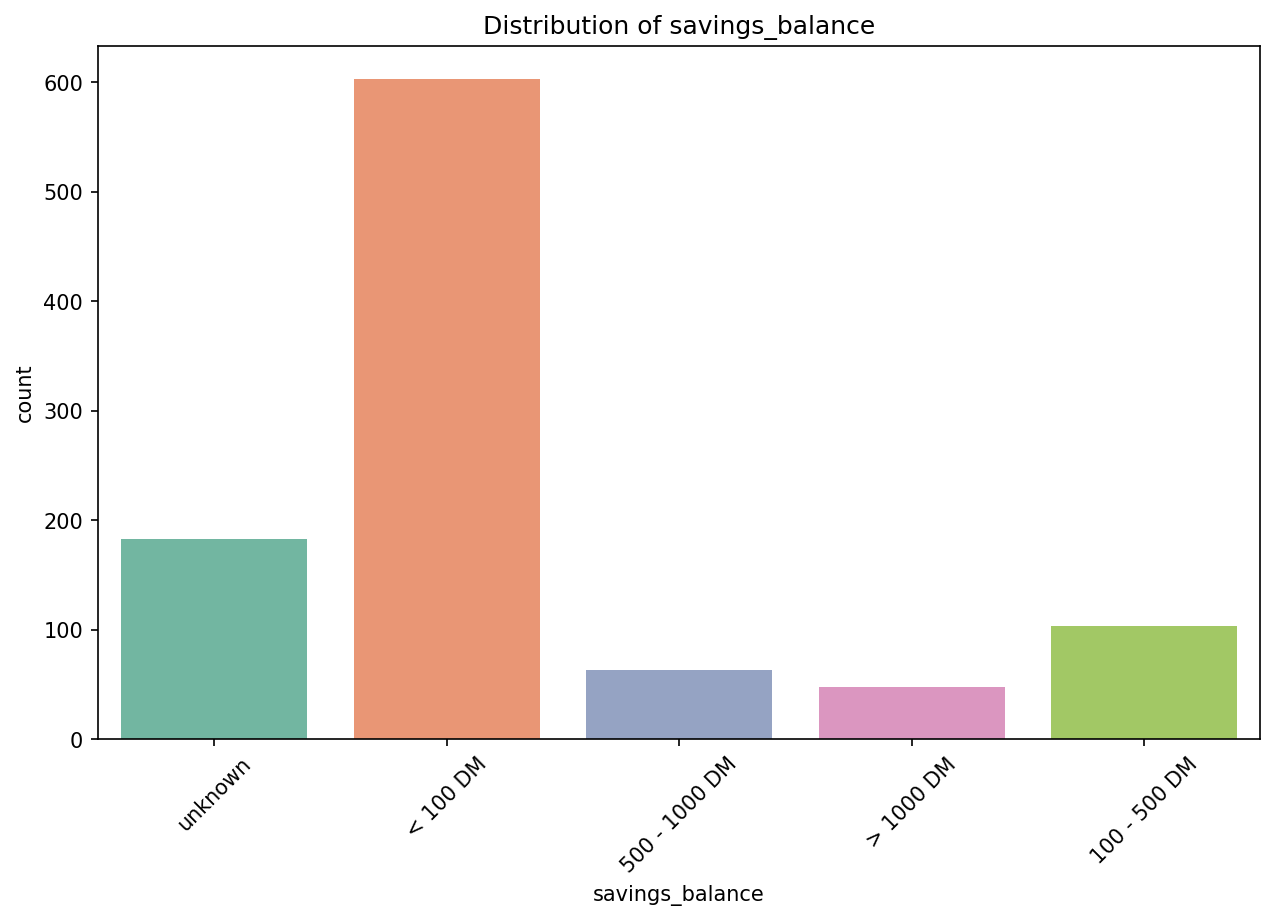

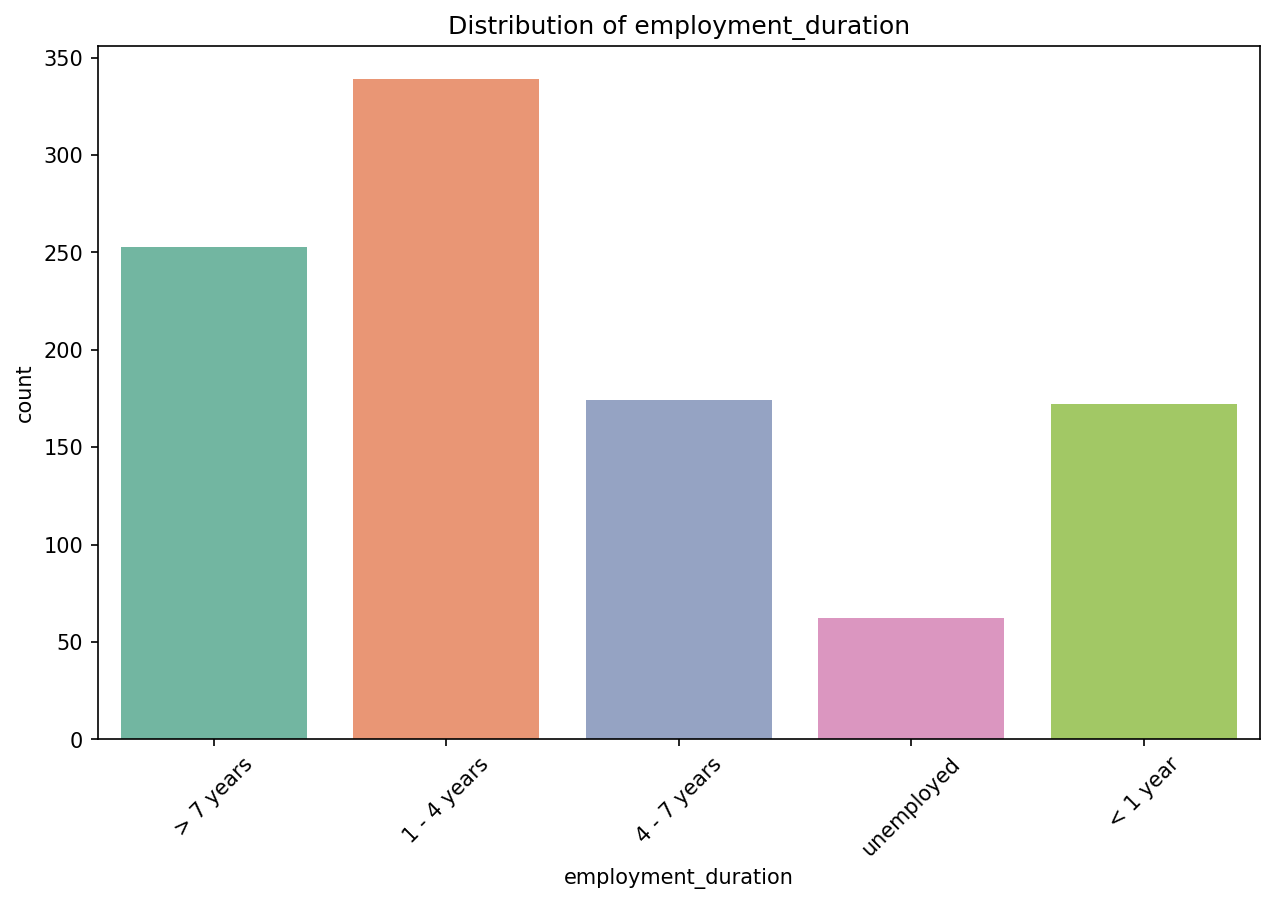

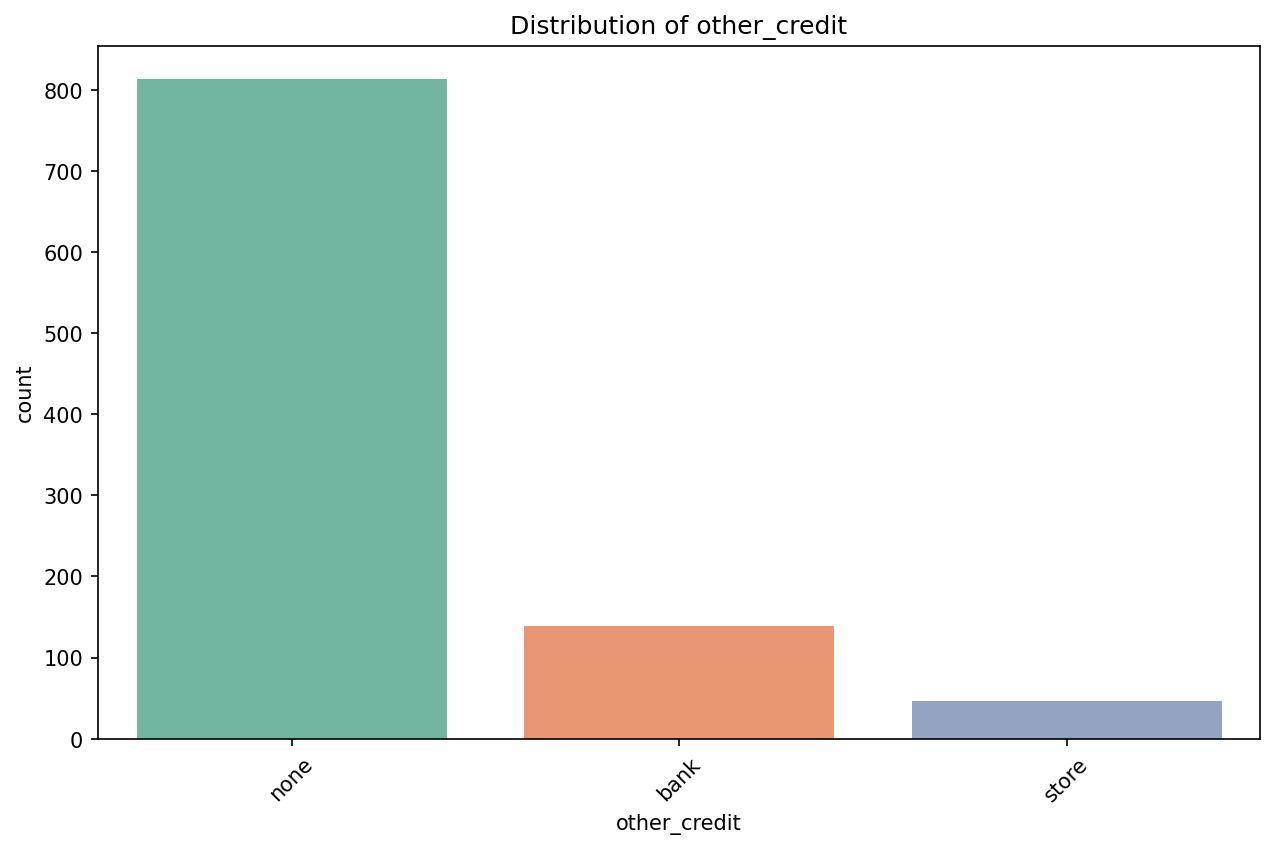

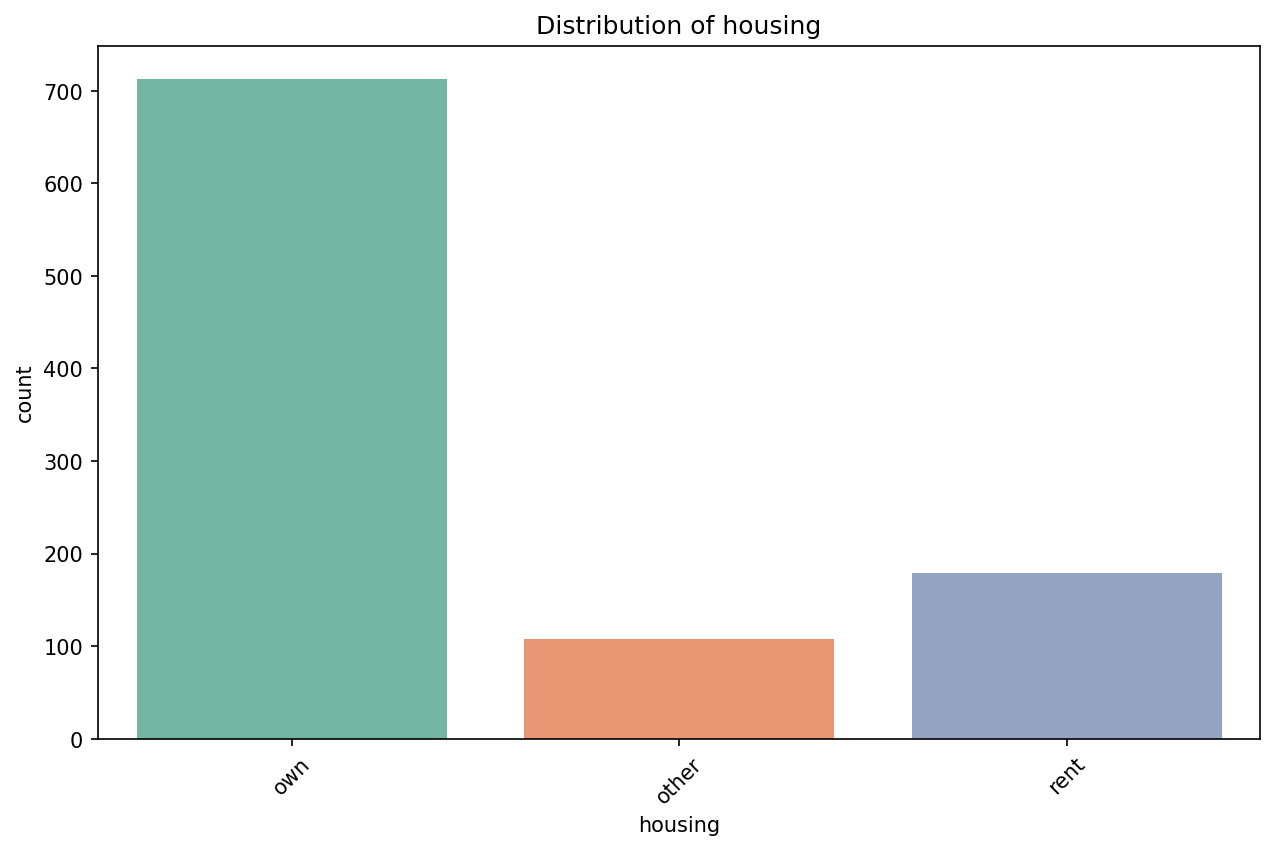

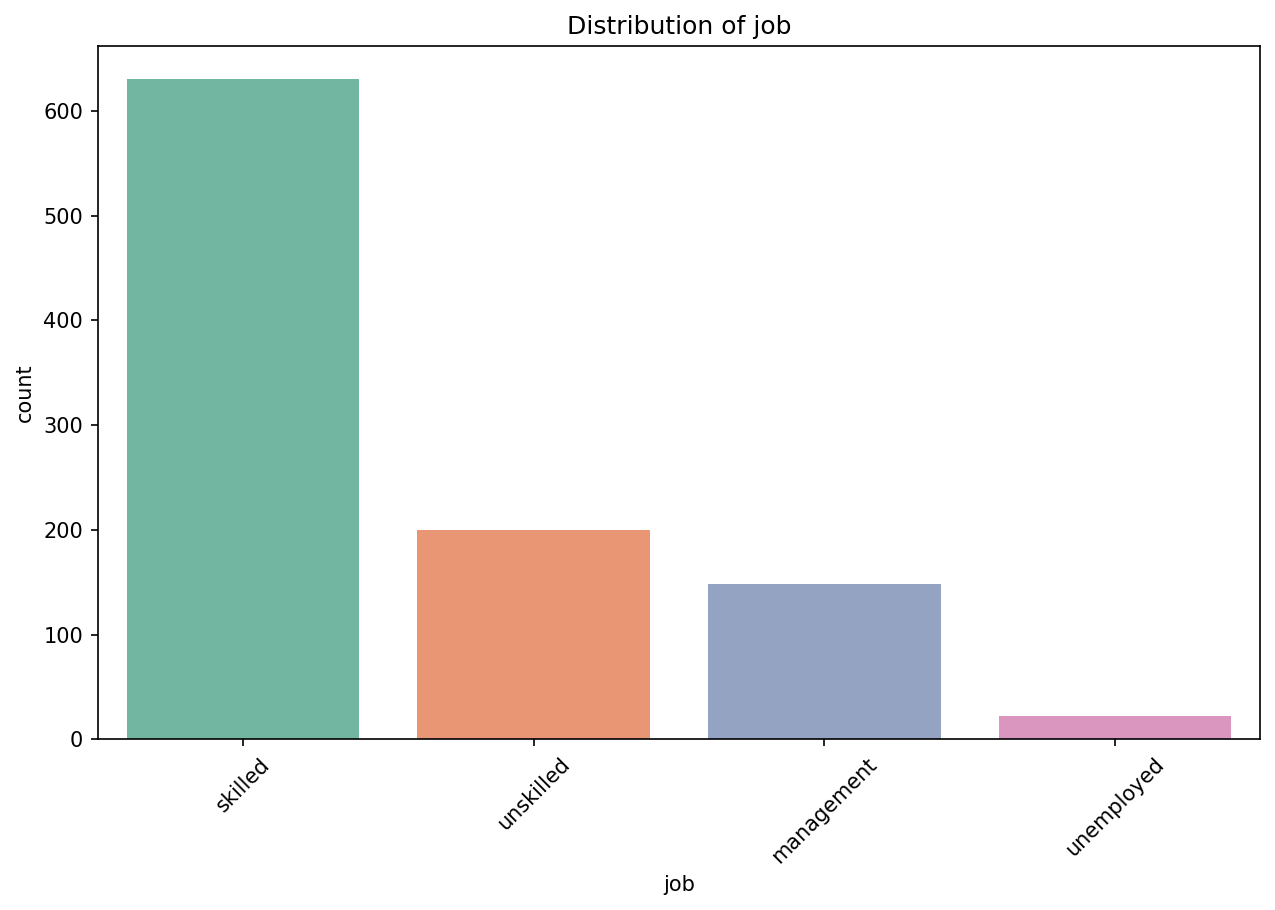

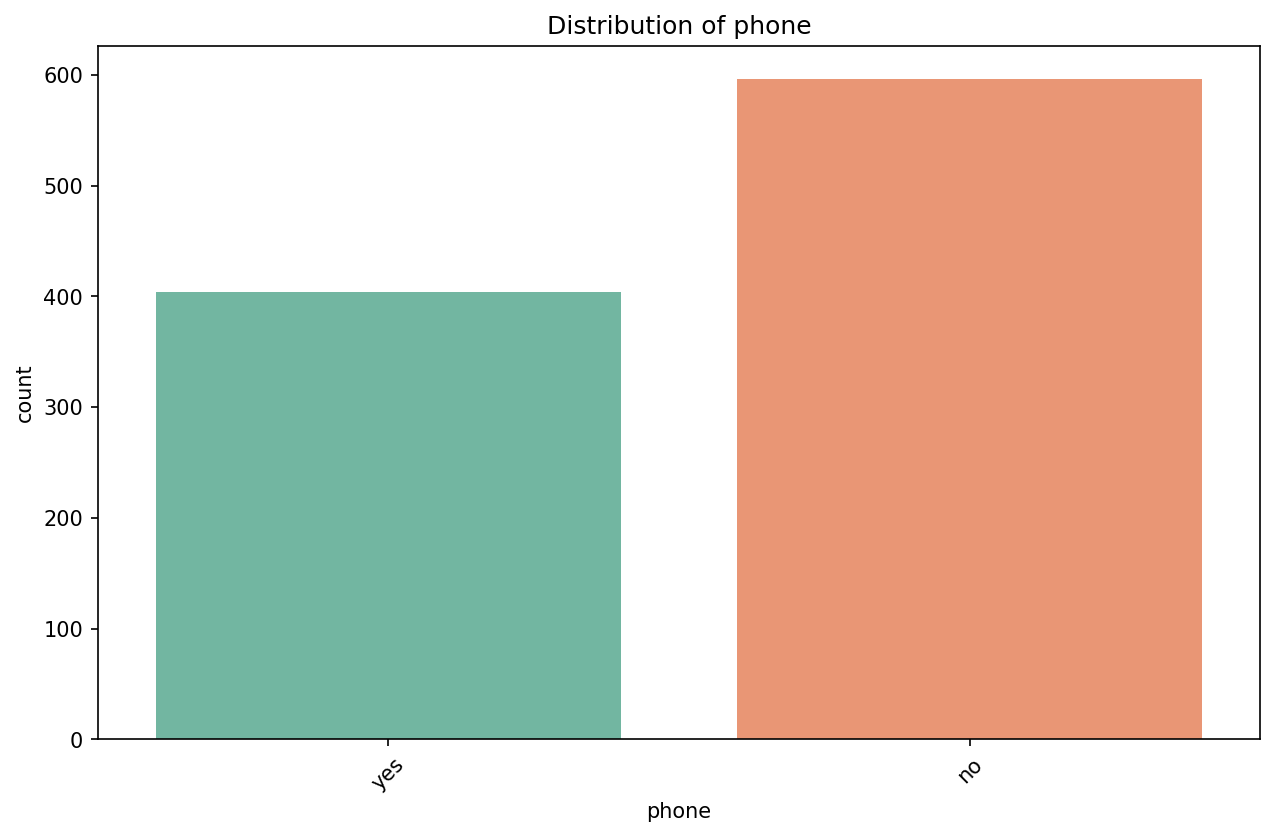

In [ ]:
# Bar plots for each categorical feature
for feature in categorical_features:
    plt.figure(figsize=(10, 6), dpi=150)
    sns.countplot(data=df, x=feature, palette='Set2')
    plt.title(f'Distribution of {feature}')
    plt.xticks(rotation=45)
    plt.show()

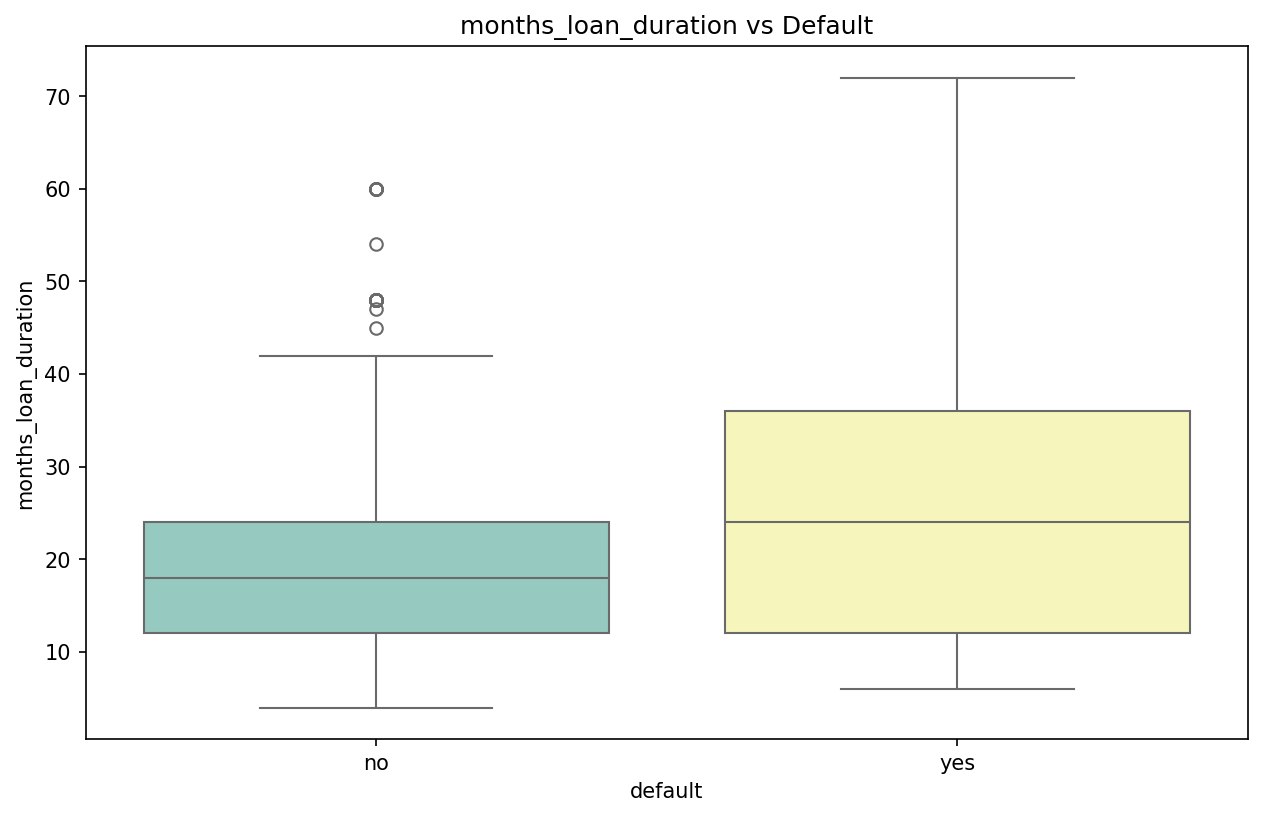

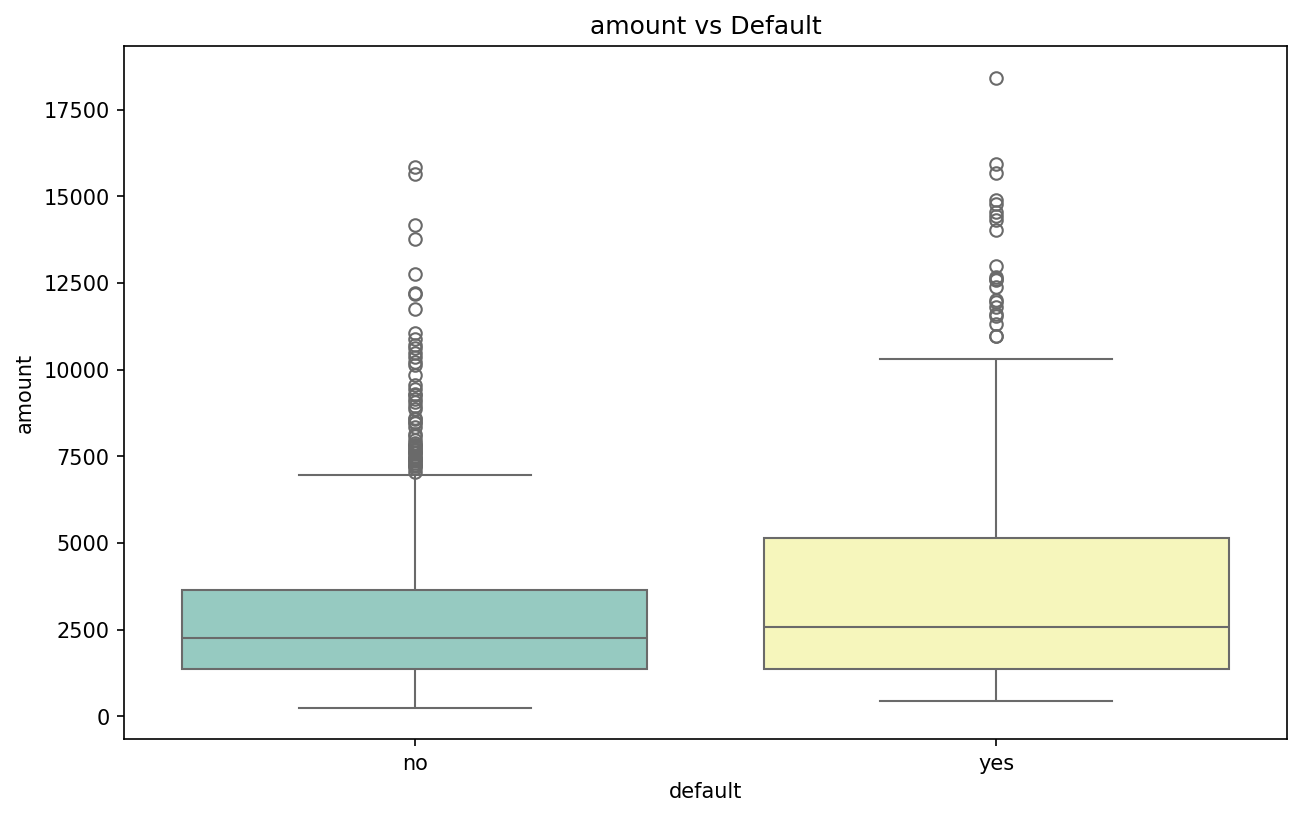

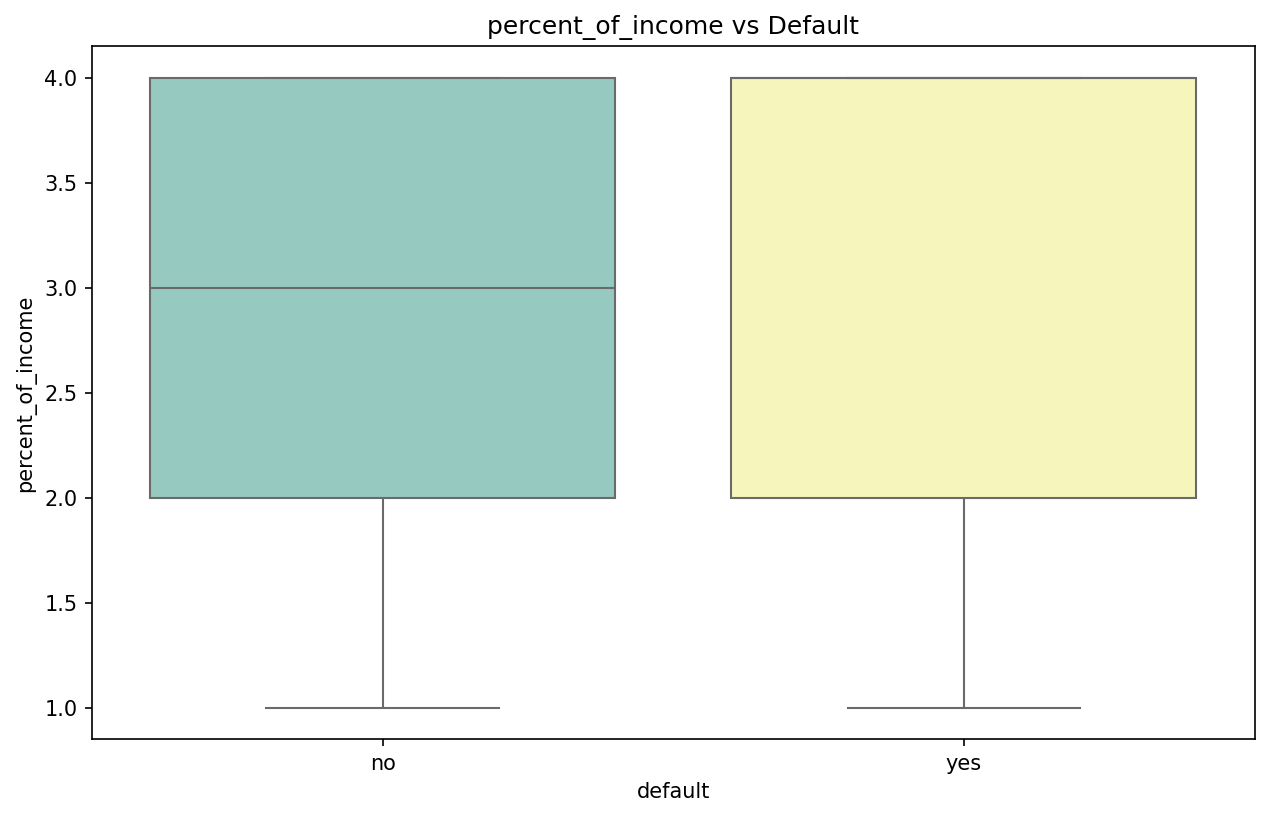

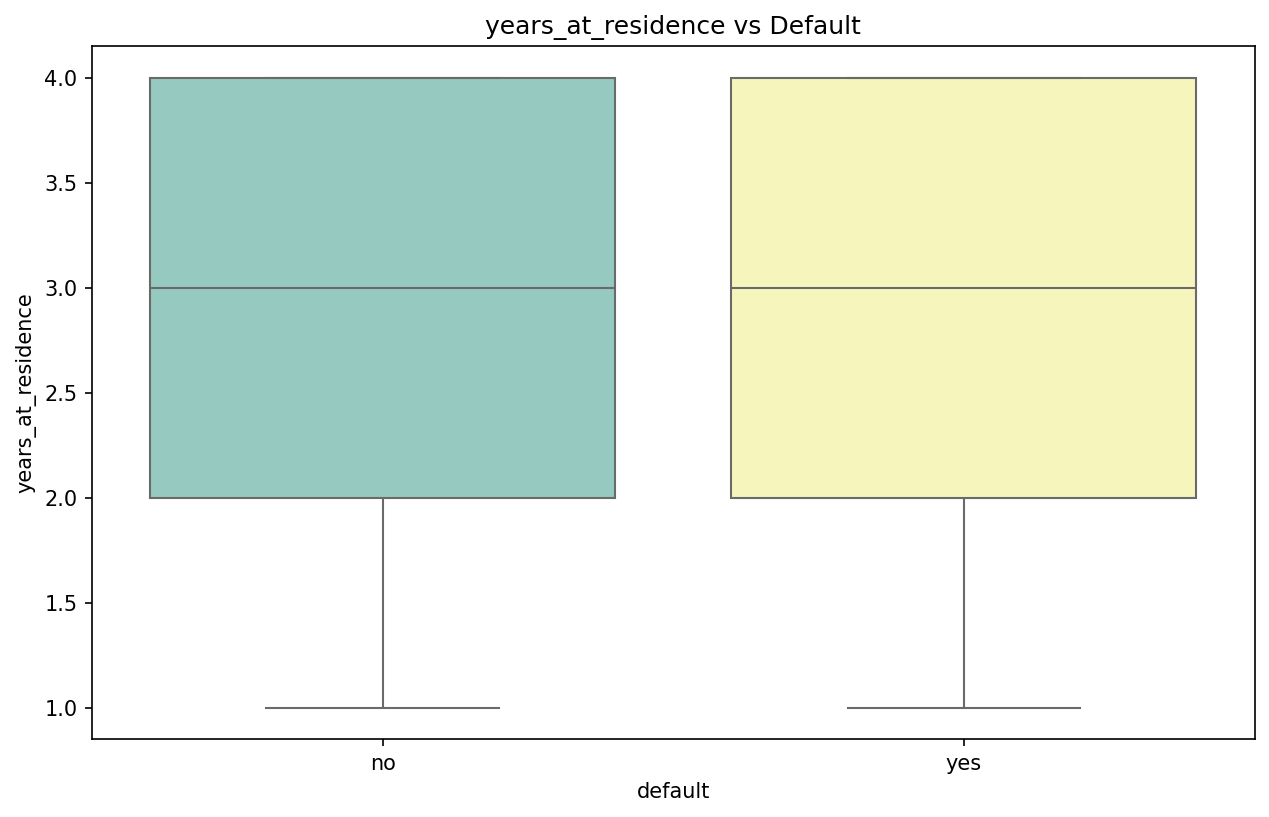

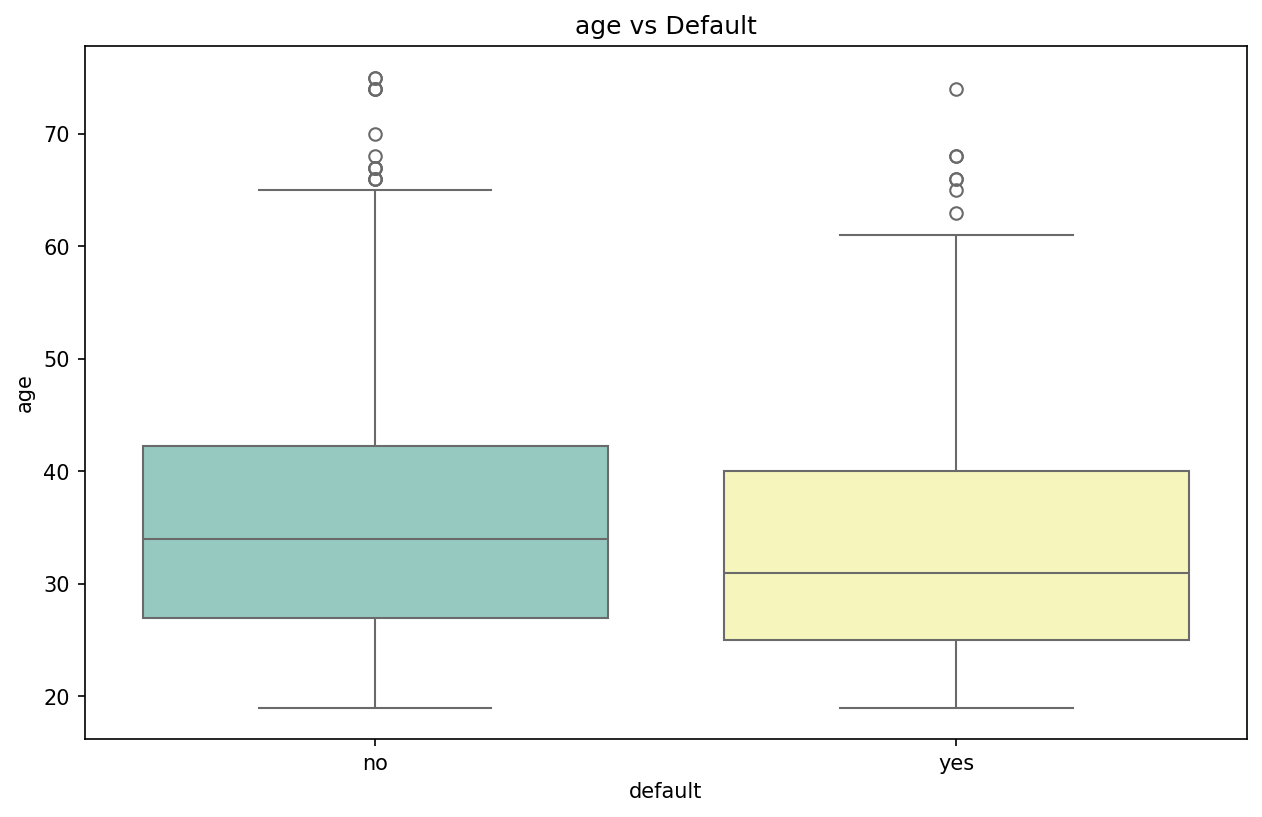

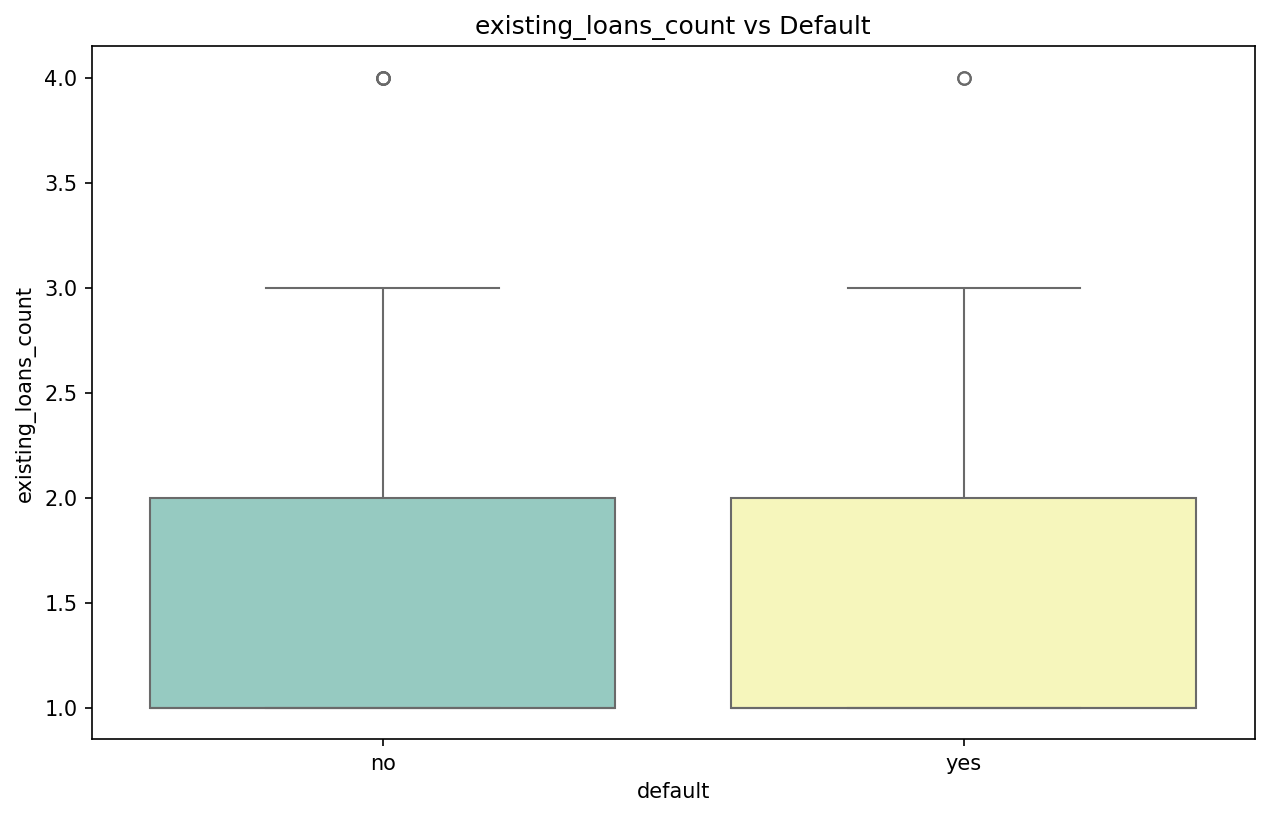

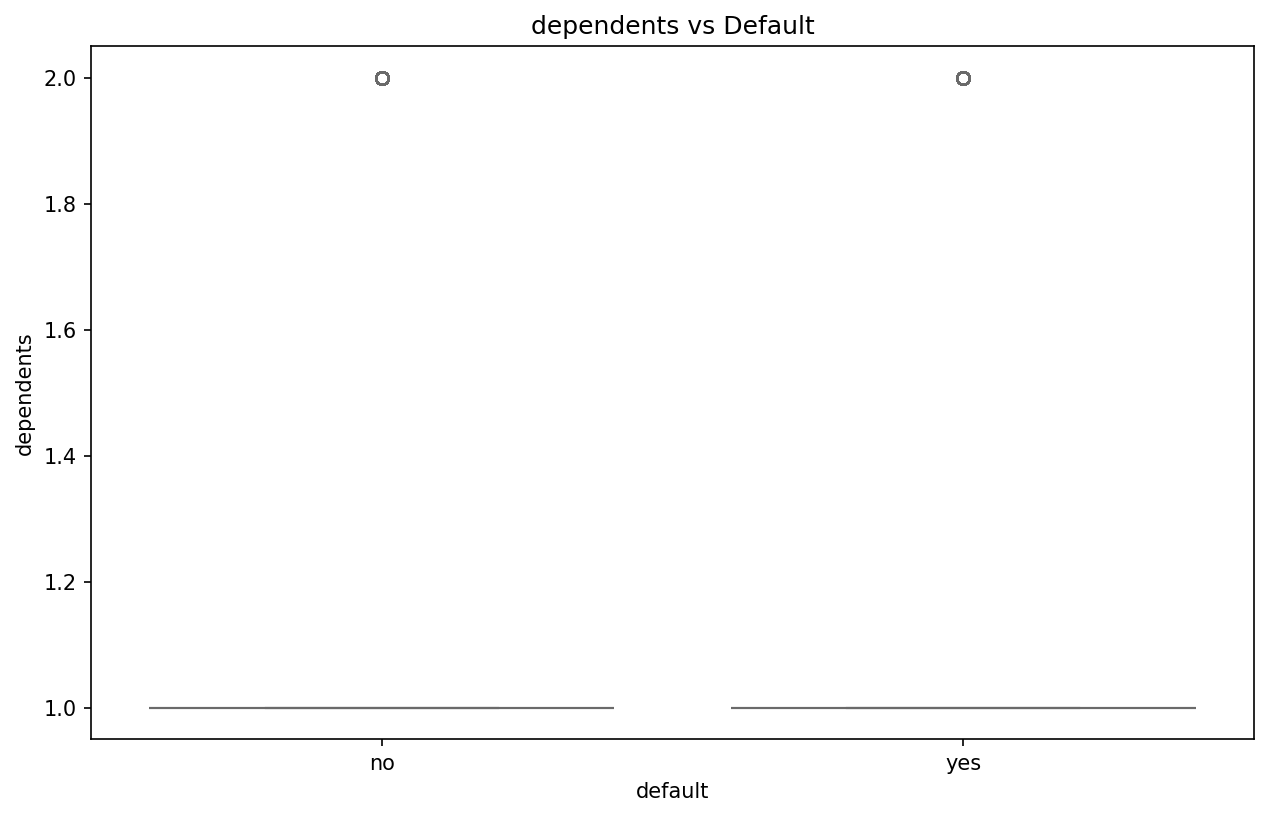

In [ ]:
# Box plots to see the distribution of numerical features against the target variable 'default'
for feature in numerical_features:
    plt.figure(figsize=(10, 6), dpi=150)
    sns.boxplot(x='default', y=feature, data=df, palette='Set3')
    plt.title(f'{feature} vs Default')
    plt.show()

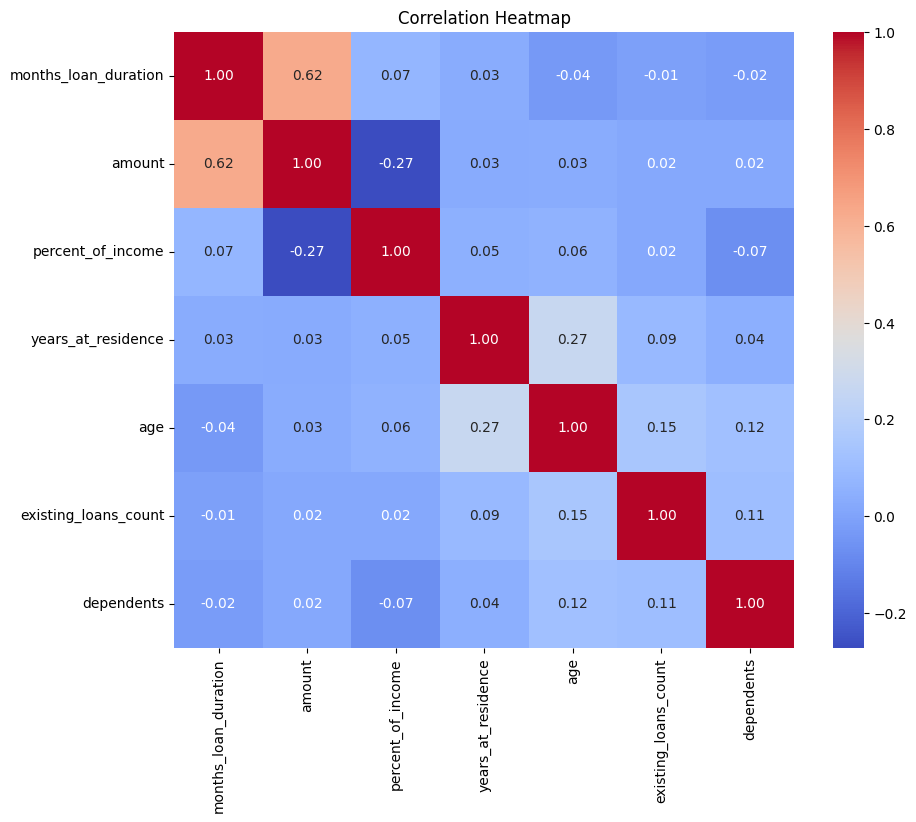

In [ ]:
# Compute the correlation matrix
corr = df[numerical_features].corr()

# Generate a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


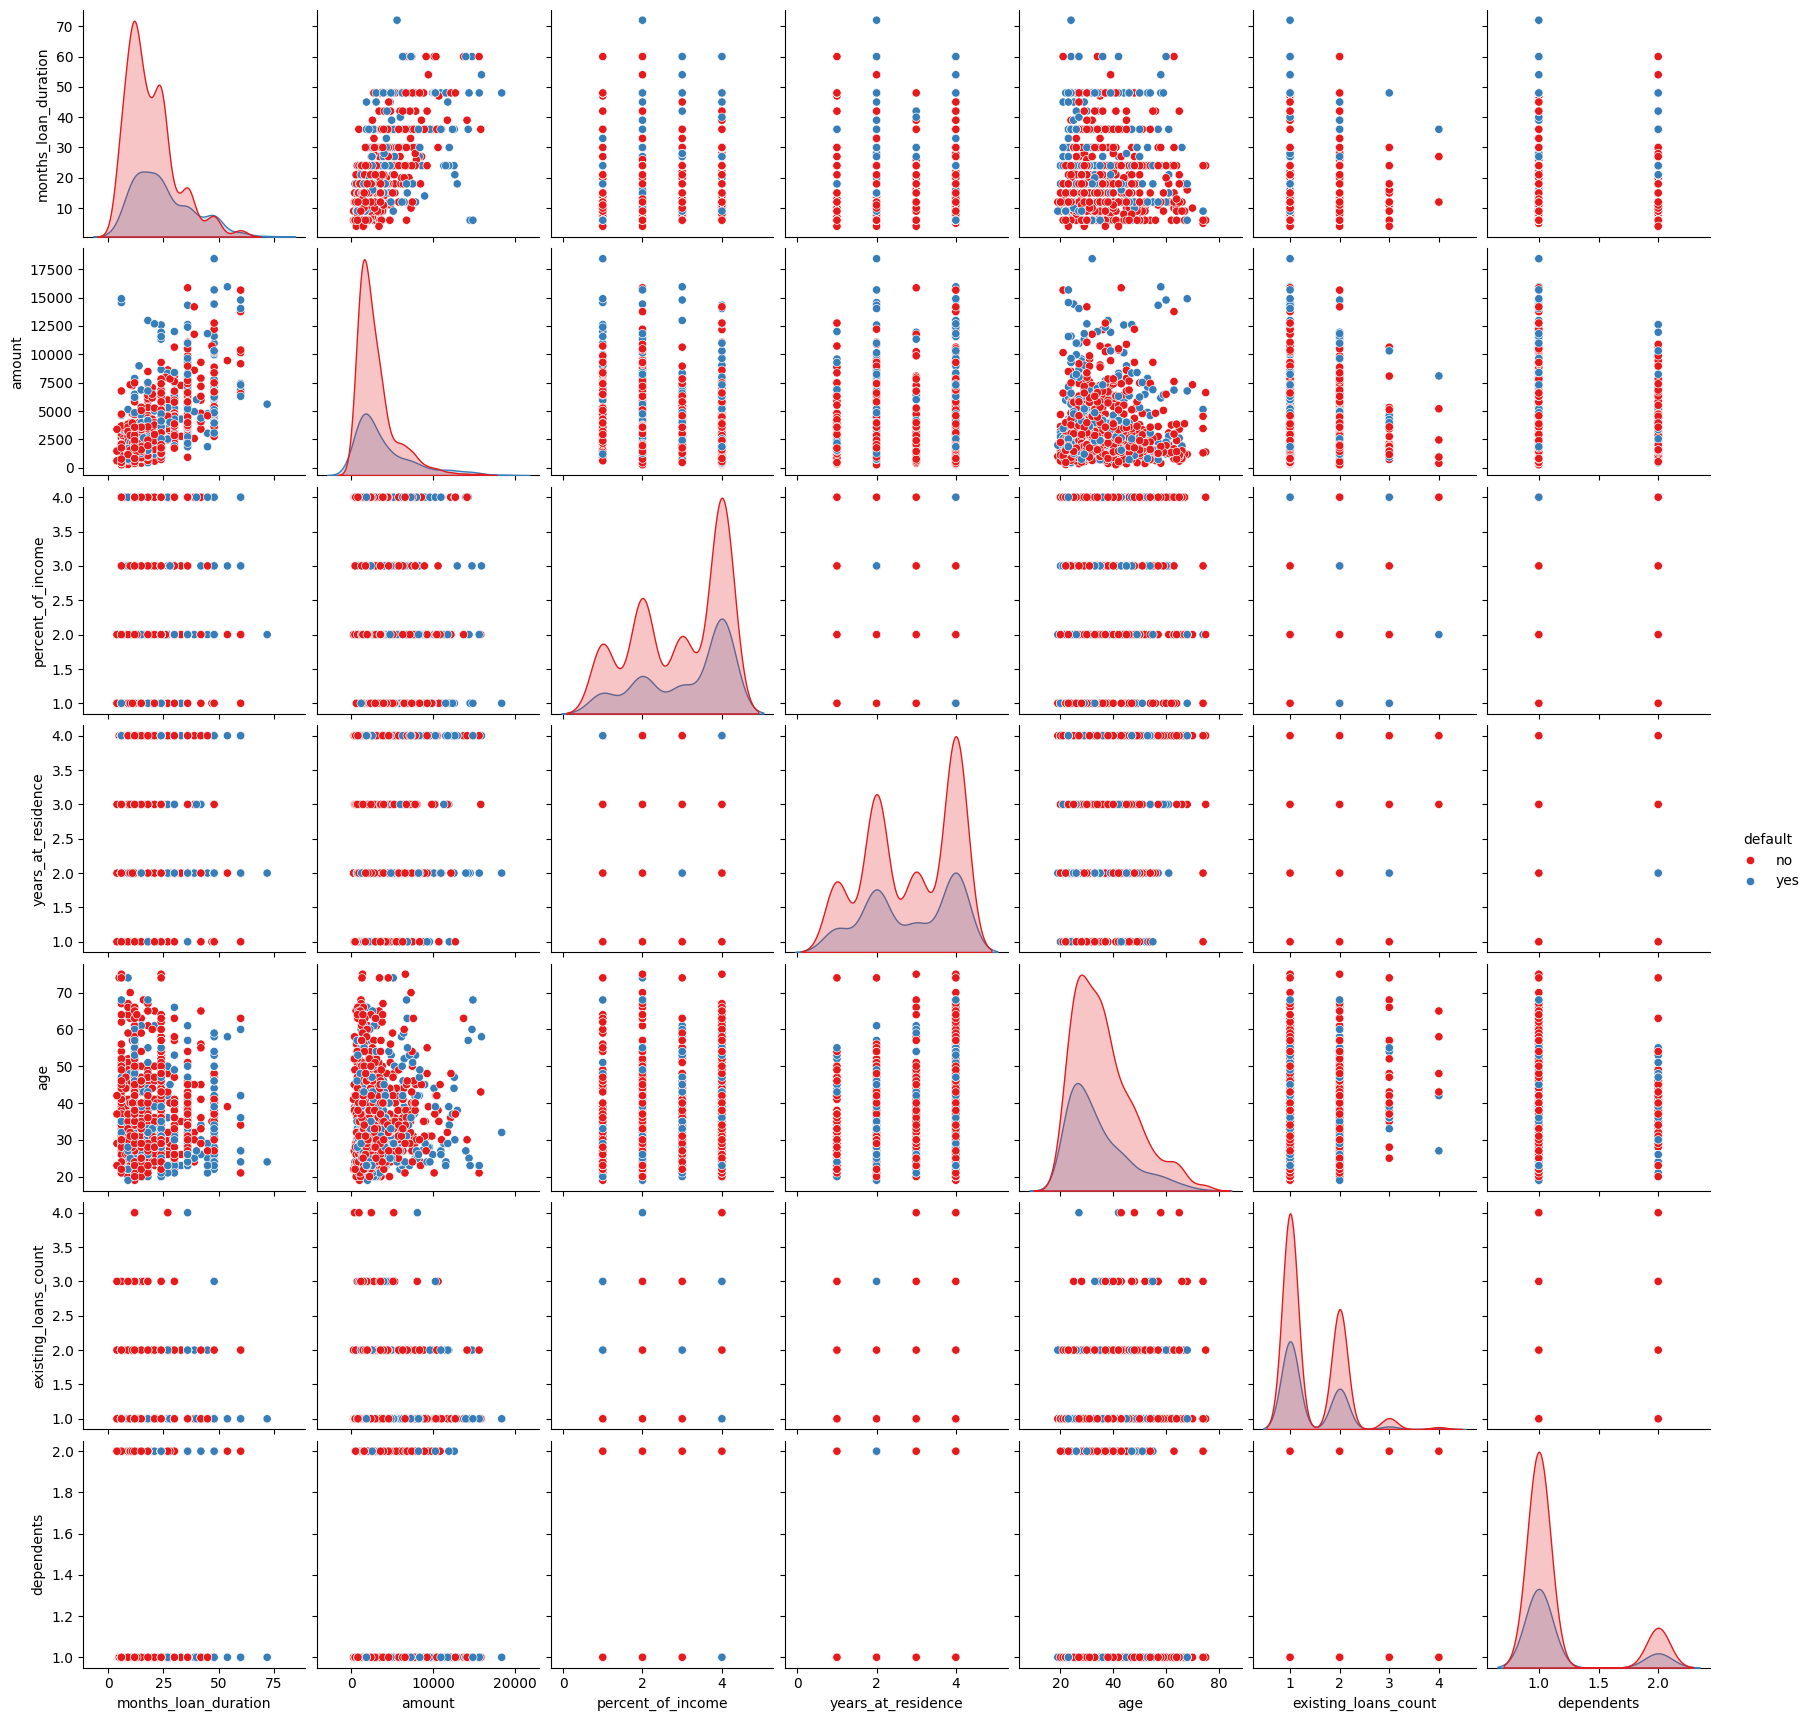

In [ ]:
# Pair plot to visualize relationships between numerical variables
sns.pairplot(df, hue='default', vars=numerical_features, palette='Set1')
plt.show()

In [ ]:
import plotly.express as px
fig = px.scatter_matrix(df, dimensions=numerical_features, color='default', title='Scatter Matrix',width=2100, height=1200)
fig.show()


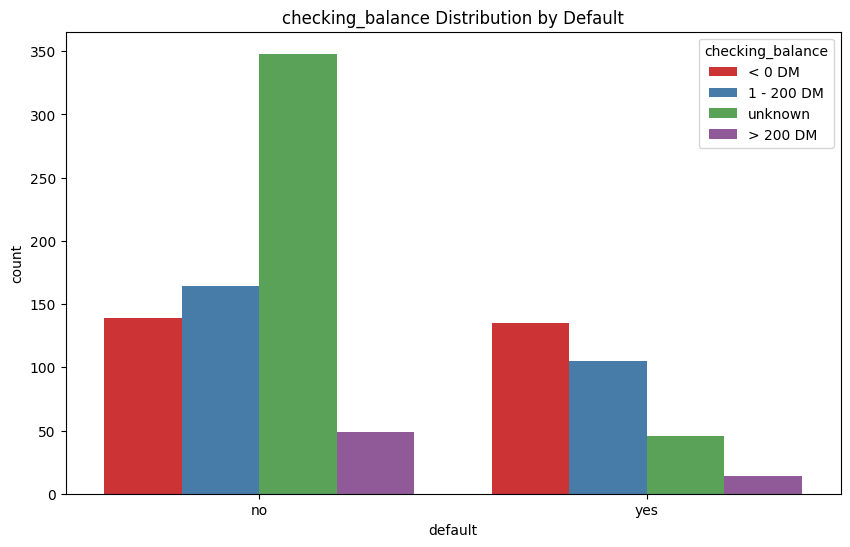

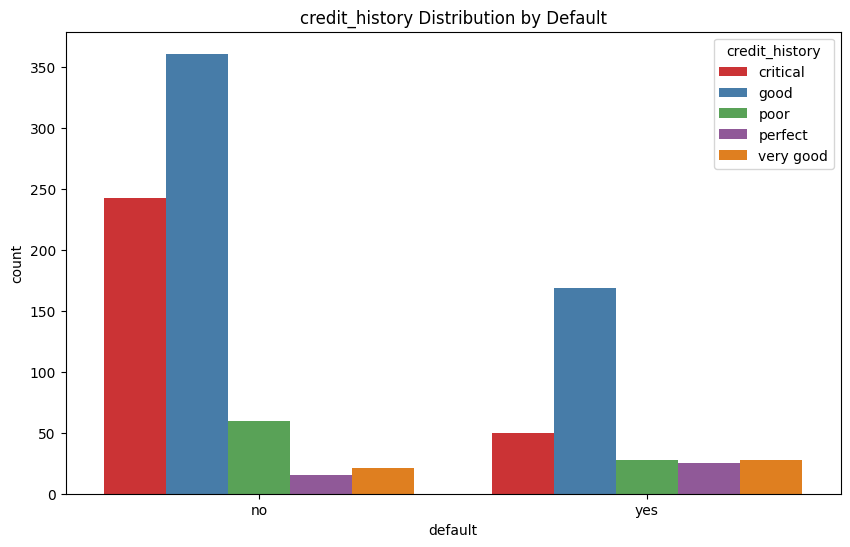

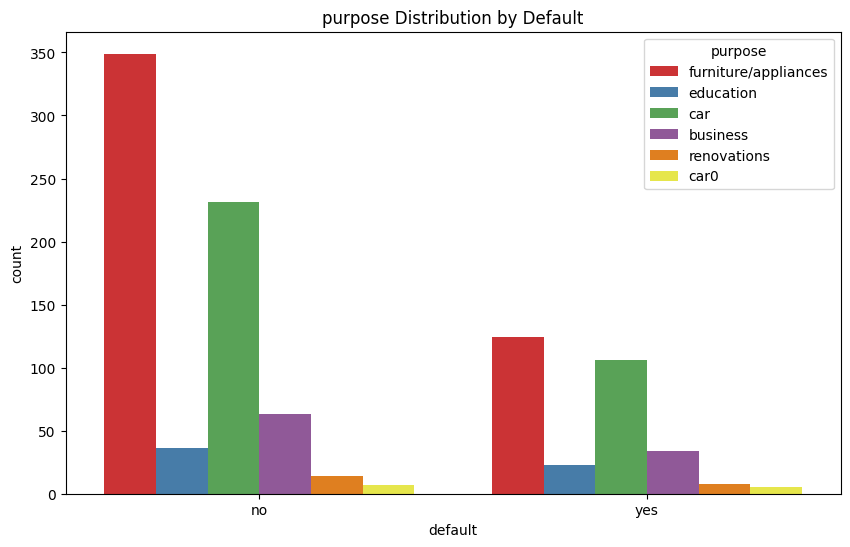

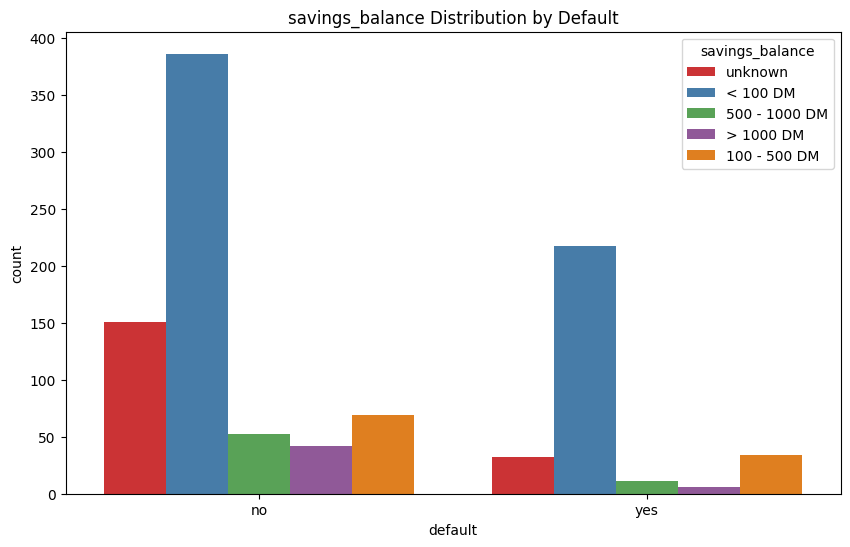

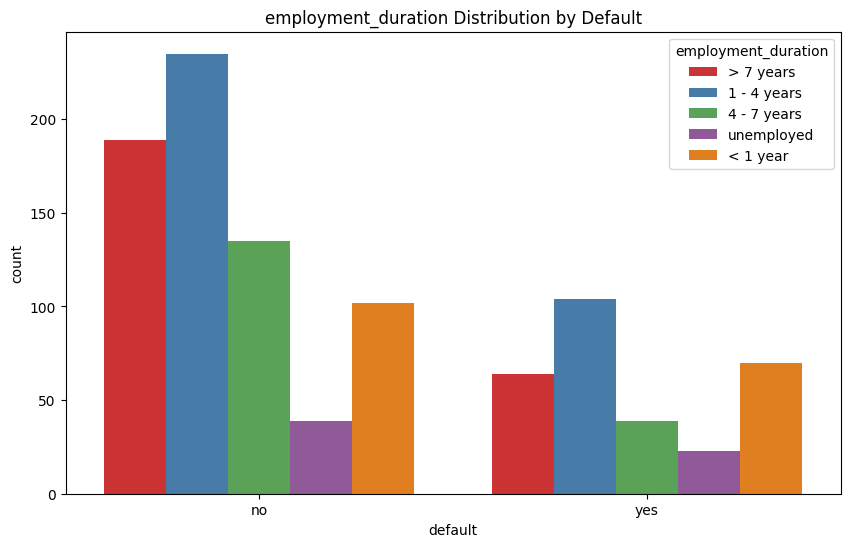

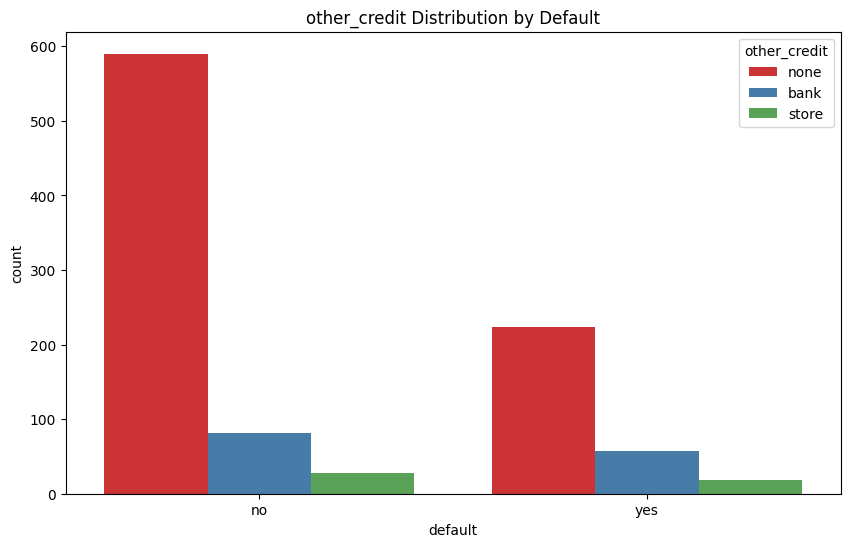

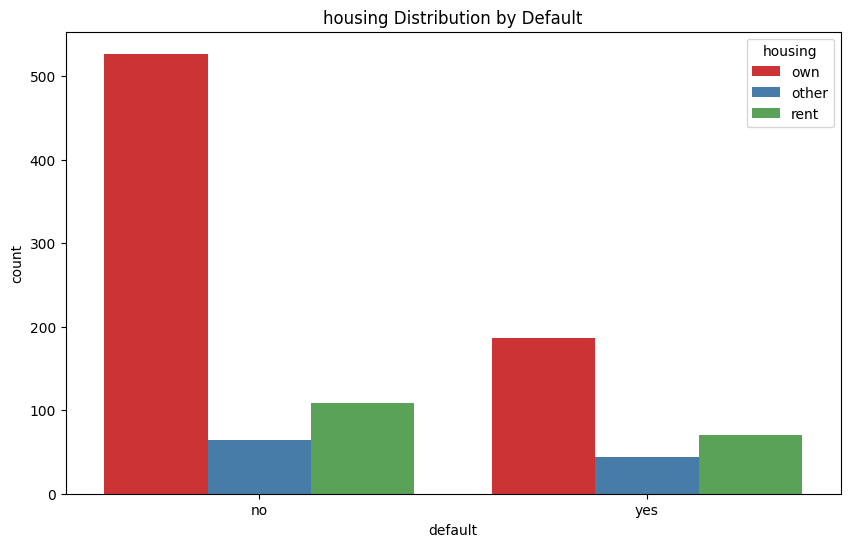

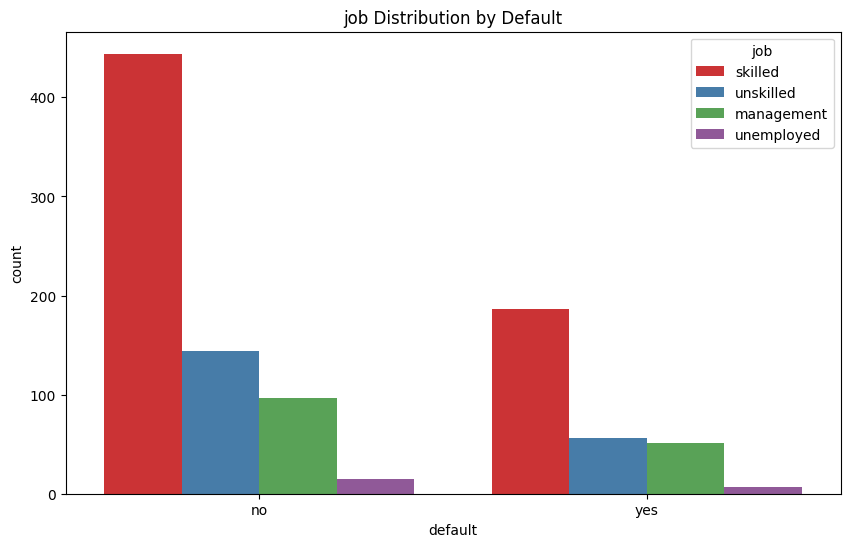

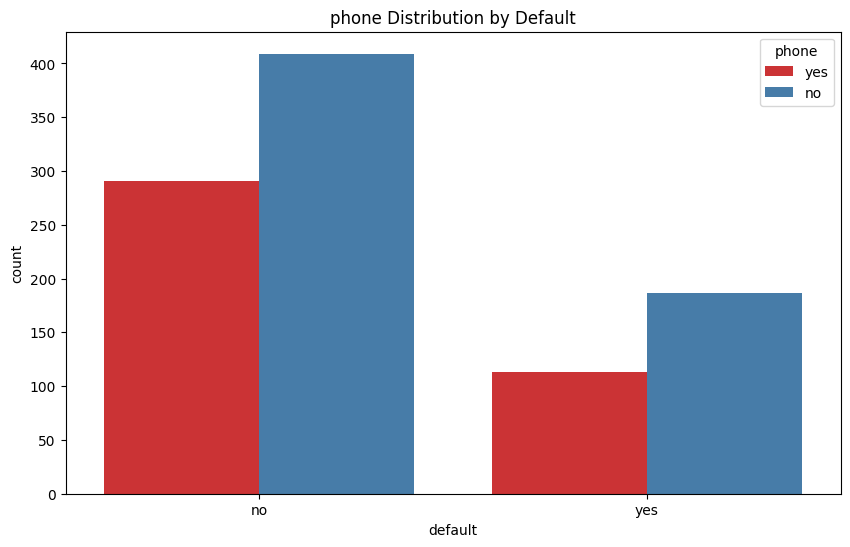

In [ ]:
for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.countplot(x='default', hue=feature, data=df, palette='Set1')
    plt.title(f'{feature} Distribution by Default')
    plt.show()

# 4. Data Preprocessing and Feature Selection

## 4.1 Data Preprocessing

In [10]:
df1=df.copy()

In [11]:
df1['purpose']=df1['purpose'].replace('car0','car')

In [12]:
df1['purpose'].unique()

array(['furniture/appliances', 'education', 'car', 'business',
       'renovations'], dtype=object)

In [13]:
df1.loc[df1['employment_duration'] == 'unemployed', 'job'] = 'unemployed'
df1.loc[df1['job'] == 'unemployed', 'employment_duration'] = 'unemployed'

In [14]:
scaler = StandardScaler()

df1[numerical_features] = scaler.fit_transform(df1[numerical_features])

In [15]:
df1['housing'].unique()

array(['own', 'other', 'rent'], dtype=object)

In [16]:
nominal_features=['purpose','other_credit','housing','job','phone','default','checking_balance','savings_balance']
df3=pd.get_dummies(df1,columns=nominal_features, drop_first=True)

In [17]:
df3.columns

Index(['months_loan_duration', 'credit_history', 'amount',
       'employment_duration', 'percent_of_income', 'years_at_residence', 'age',
       'existing_loans_count', 'dependents', 'purpose_car',
       'purpose_education', 'purpose_furniture/appliances',
       'purpose_renovations', 'other_credit_none', 'other_credit_store',
       'housing_own', 'housing_rent', 'job_skilled', 'job_unemployed',
       'job_unskilled', 'phone_yes', 'default_yes', 'checking_balance_< 0 DM',
       'checking_balance_> 200 DM', 'checking_balance_unknown',
       'savings_balance_500 - 1000 DM', 'savings_balance_< 100 DM',
       'savings_balance_> 1000 DM', 'savings_balance_unknown'],
      dtype='object')

In [18]:
new_names = {'purpose_furniture/appliances': 'purpose_furniture_or_appliances',
             'checking_balance_< 0 DM': 'checking_balance_lessthan 0 DM',
             'checking_balance_> 200 DM': 'checking_balance_lessthan 200 DM',
             'savings_balance_< 100 DM': 'saving_balance_lessthan 100 DM',
             'savings_balance_> 1000 DM': 'saving_balance_morethan 1000 DM',
             }

df3 = df3.rename(columns=new_names)

In [19]:
employment_duration_mapping = {
    'unemployed': 0,
    '< 1 year': 1,
    '1 - 4 years': 2,
    '4 - 7 years': 3,
    '> 7 years': 4
}
df3['employment_duration_e'] = df3['employment_duration'].map(employment_duration_mapping)
df3 = df3.drop('employment_duration', axis=1)


credit_history_mapping={
    'critical':0,
    'good':1,
    'poor':2,
    'perfect':3,
    'very good':4
}
df3['credit_history_e']=df3['credit_history'].map(credit_history_mapping)
df3=df3.drop('credit_history',axis=1)

In [20]:
df3.head()

,months_loan_duration,amount,percent_of_income,years_at_residence,age,existing_loans_count,dependents,purpose_car,purpose_education,purpose_furniture_or_appliances,...,default_yes,checking_balance_lessthan 0 DM,checking_balance_lessthan 200 DM,checking_balance_unknown,savings_balance_500 - 1000 DM,saving_balance_lessthan 100 DM,saving_balance_morethan 1000 DM,savings_balance_unknown,employment_duration_e,credit_history_e
0,-1.236478,-0.745131,0.918477,1.046987,2.766456,1.027079,-0.428290,False,False,True,...,False,True,False,False,False,False,False,True,4,0
1,2.248194,0.949817,-0.870183,-0.765977,-1.191404,-0.704926,-0.428290,False,False,True,...,True,False,False,False,False,True,False,False,2,1
2,-0.738668,-0.416562,-0.870183,0.140505,1.183312,-0.704926,2.334869,False,True,False,...,False,False,False,True,False,True,False,False,3,0
3,1.750384,1.634247,-0.870183,1.046987,0.831502,-0.704926,2.334869,False,False,True,...,False,True,False,False,False,True,False,False,3,1
4,0.256953,0.566664,0.024147,1.046987,1.535122,1.027079,2.334869,True,False,False,...,True,True,False,False,False,True,False,False,2,2


In [21]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 29 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   months_loan_duration              1000 non-null   float64
 1   amount                            1000 non-null   float64
 2   percent_of_income                 1000 non-null   float64
 3   years_at_residence                1000 non-null   float64
 4   age                               1000 non-null   float64
 5   existing_loans_count              1000 non-null   float64
 6   dependents                        1000 non-null   float64
 7   purpose_car                       1000 non-null   bool   
 8   purpose_education                 1000 non-null   bool   
 9   purpose_furniture_or_appliances   1000 non-null   bool   
 10  purpose_renovations               1000 non-null   bool   
 11  other_credit_none                 1000 non-null   bool   
 12  other_c

## 4.2 Upsampling

In [22]:
minority_df=df3[df3['default_yes']==1]
majority_df=df3[df3['default_yes']==0]

from sklearn.utils import resample
minority_upsampled=resample(minority_df,replace=True,n_samples=len(majority_df),random_state=42)
upsampled_df=pd.concat([majority_df,minority_upsampled])
upsampled_df['default_yes'].value_counts()

,count
default_yes,
False,700
True,700


In [23]:
X = upsampled_df.drop(columns=['default_yes'])
y = upsampled_df['default_yes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

## 4.3 Feature selection

Optimal number of features: 21


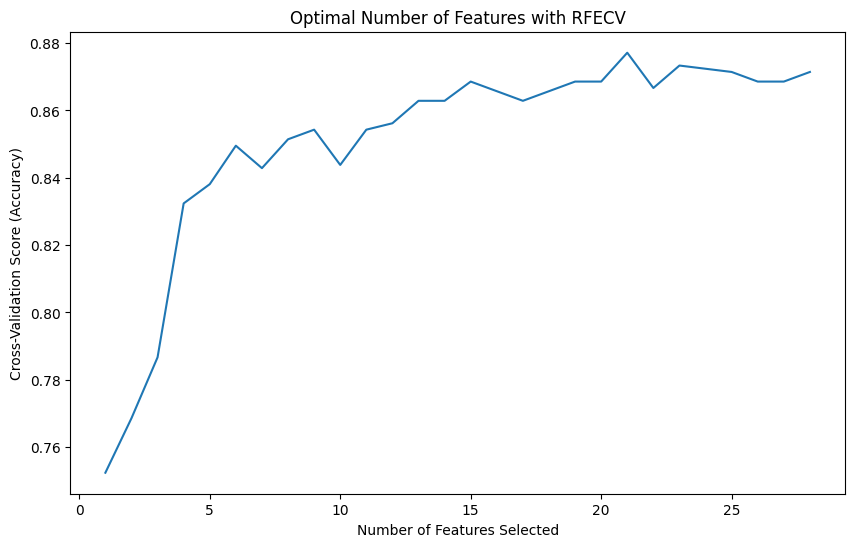

Selected Features: Index(['months_loan_duration', 'amount', 'percent_of_income',
       'years_at_residence', 'age', 'existing_loans_count', 'dependents',
       'purpose_car', 'purpose_furniture_or_appliances', 'other_credit_none',
       'housing_own', 'housing_rent', 'job_skilled', 'job_unskilled',
       'phone_yes', 'checking_balance_lessthan 0 DM',
       'checking_balance_unknown', 'saving_balance_lessthan 100 DM',
       'savings_balance_unknown', 'employment_duration_e', 'credit_history_e'],
      dtype='object')


In [24]:
rf = RandomForestClassifier(random_state=42)

rfecv = RFECV(estimator=rf, step=1, cv=StratifiedKFold(5), scoring='accuracy')

rfecv.fit(X_train, y_train)

optimal_features = rfecv.n_features_

print(f"Optimal number of features: {optimal_features}")

plt.figure(figsize=(10, 6))
plt.xlabel("Number of Features Selected")
plt.ylabel("Cross-Validation Score (Accuracy)")
plt.plot(range(1, len(rfecv.cv_results_['mean_test_score']) + 1), rfecv.cv_results_['mean_test_score'])
plt.title("Optimal Number of Features with RFECV")
plt.show()

ranking = rfecv.ranking_
selected_features = X_train.columns[rfecv.support_]

print("Selected Features:", selected_features)

In [25]:
dropped_features = set(df3.columns) - set(selected_features)
print("Dropped Features:", dropped_features)

Dropped Features: {'purpose_renovations', 'savings_balance_500 - 1000 DM', 'purpose_education', 'job_unemployed', 'other_credit_store', 'default_yes', 'checking_balance_lessthan 200 DM', 'saving_balance_morethan 1000 DM'}


In [26]:
X_train_ = X_train[selected_features]
X_test_ = X_test[selected_features]

# 5. Model training

## 5.1 Random Forest Classifier

In [27]:
rf = RandomForestClassifier(random_state=42)

rf.fit(X_train_, y_train)

y_pred_rf = rf.predict(X_test_)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, y_pred_rf)

print("Random Forest Classifier:")
print("Test Accuracy:", accuracy_rf)
print("Test Precision:", precision_rf)
print("Test Recall:", recall_rf)
print("Test ROC AUC:", roc_auc_rf)

print("\n\n")
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

Random Forest Classifier:
Test Accuracy: 0.8742857142857143
Test Precision: 0.8469387755102041
Test Recall: 0.9222222222222223
Test ROC AUC: 0.8728758169934641



Classification Report:
              precision    recall  f1-score   support

       False       0.91      0.82      0.86       170
        True       0.85      0.92      0.88       180

    accuracy                           0.87       350
   macro avg       0.88      0.87      0.87       350
weighted avg       0.88      0.87      0.87       350

Confusion Matrix:
[[140  30]
 [ 14 166]]


In [28]:
param_grid = {
    'n_estimators': [100, 200, 300,400],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

grid_search.fit(X_train_, y_train)

print("Best Hyperparameters:", grid_search.best_params_)

best_rf = grid_search.best_estimator_

y_pred_rf_ht = best_rf.predict(X_test_)
accuracy_rf_ht = accuracy_score(y_test, y_pred_rf_ht)
precision_rf_ht = precision_score(y_test, y_pred_rf_ht)
recall_rf_ht = recall_score(y_test, y_pred_rf_ht)
roc_auc_rf_ht = roc_auc_score(y_test, y_pred_rf_ht)

print("Random Forest Classifier after Hyperparameter tuning:")
print("Test Accuracy:", accuracy_rf_ht)
print("Test Precision:", precision_rf_ht)
print("Test Recall:", recall_rf_ht)
print("Test ROC AUC:", roc_auc_rf_ht)

print("\n\n")
print("Classification Report:")
print(classification_report(y_test, y_pred_rf_ht))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf_ht))


Fitting 5 folds for each of 288 candidates, totalling 1440 fits
Best Hyperparameters: {'bootstrap': False, 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Random Forest Classifier after Hyperparameter tuning:
Test Accuracy: 0.9
Test Precision: 0.9005524861878453
Test Recall: 0.9055555555555556
Test ROC AUC: 0.8998366013071896



Classification Report:
              precision    recall  f1-score   support

       False       0.90      0.89      0.90       170
        True       0.90      0.91      0.90       180

    accuracy                           0.90       350
   macro avg       0.90      0.90      0.90       350
weighted avg       0.90      0.90      0.90       350

Confusion Matrix:
[[152  18]
 [ 17 163]]


## 5.2 Gradient Boost Classifier

In [29]:
gbc = GradientBoostingClassifier(random_state=42)

gbc.fit(X_train_, y_train)

y_pred_gbc = gbc.predict(X_test_)

accuracy_gbc = accuracy_score(y_test, y_pred_gbc)
precision_gbc = precision_score(y_test, y_pred_gbc)
recall_gbc = recall_score(y_test, y_pred_gbc)
roc_auc_gbc = roc_auc_score(y_test, y_pred_gbc)

print("Gradient Boost Classifier:")
print("Test Accuracy:", accuracy_gbc)
print("Test Precision:", precision_gbc)
print("Test Recall:", recall_gbc)
print("Test ROC AUC:", roc_auc_gbc)

print("\n\n")
print("Classification Report:")
print(classification_report(y_test, y_pred_gbc))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_gbc))


Gradient Boost Classifier:
Test Accuracy: 0.8
Test Precision: 0.7864583333333334
Test Recall: 0.8388888888888889
Test ROC AUC: 0.7988562091503268



Classification Report:
              precision    recall  f1-score   support

       False       0.82      0.76      0.79       170
        True       0.79      0.84      0.81       180

    accuracy                           0.80       350
   macro avg       0.80      0.80      0.80       350
weighted avg       0.80      0.80      0.80       350

Confusion Matrix:
[[129  41]
 [ 29 151]]


## 5.3 XGBoost Classifier

In [30]:
xgb = XGBClassifier(random_state=42, scale_pos_weight=1)

xgb.fit(X_train_, y_train)

y_pred_xgb = xgb.predict(X_test_)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb)
recall_xgb = recall_score(y_test, y_pred_xgb)
roc_auc_xgb = roc_auc_score(y_test, y_pred_xgb)

print("XG Boost Classifier:")
print("Test Accuracy:", accuracy_xgb)
print("Test Precision:", precision_xgb)
print("Test Recall:", recall_xgb)
print("Test ROC AUC:", roc_auc_xgb)

print("\n\n")
print("Classification Report:")
print(classification_report(y_test, y_pred_xgb))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_xgb))


XG Boost Classifier:
Test Accuracy: 0.8771428571428571
Test Precision: 0.8549222797927462
Test Recall: 0.9166666666666666
Test ROC AUC: 0.8759803921568626



Classification Report:
              precision    recall  f1-score   support

       False       0.90      0.84      0.87       170
        True       0.85      0.92      0.88       180

    accuracy                           0.88       350
   macro avg       0.88      0.88      0.88       350
weighted avg       0.88      0.88      0.88       350

Confusion Matrix:
[[142  28]
 [ 15 165]]


In [31]:
param_grid = {
    'max_depth': [5, 8, 12, 16],
    'n_estimators': [100, 200, 300, 400],
    'learning_rate': [0.01, 0.1, 0.3],
    'min_child_weight': [1, 3, 5],
    'eta': [0.1, 0.3, 0.5]
}

xgb_model = XGBClassifier(random_state=42, scale_pos_weight=1)
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5)
grid_search.fit(X_train_, y_train)

best_xgb = grid_search.best_estimator_
print("Best Hyperparameters:", grid_search.best_params_)
y_pred_xgb_ht = best_xgb.predict(X_test_)
accuracy_xgb_ht = accuracy_score(y_test, y_pred_xgb_ht)
precision_xgb_ht = precision_score(y_test, y_pred_xgb_ht)
recall_xgb_ht = recall_score(y_test, y_pred_xgb_ht)
roc_auc_xgb_ht = roc_auc_score(y_test, y_pred_xgb_ht)

print("XGBoost Classifier after Hyperparameter tuning:")
print("Test Accuracy:", accuracy_xgb_ht)
print("Test Precision:", precision_xgb_ht)
print("Test Recall:", recall_xgb_ht)
print("Test ROC AUC:", roc_auc_xgb_ht)

print("\n\n")
print("Classification Report:")
print(classification_report(y_test, y_pred_xgb_ht))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_xgb_ht))

Best Hyperparameters: {'eta': 0.1, 'learning_rate': 0.3, 'max_depth': 12, 'min_child_weight': 1, 'n_estimators': 100}
XGBoost Classifier after Hyperparameter tuning:
Test Accuracy: 0.8742857142857143
Test Precision: 0.8505154639175257
Test Recall: 0.9166666666666666
Test ROC AUC: 0.8730392156862743



Classification Report:
              precision    recall  f1-score   support

       False       0.90      0.83      0.87       170
        True       0.85      0.92      0.88       180

    accuracy                           0.87       350
   macro avg       0.88      0.87      0.87       350
weighted avg       0.88      0.87      0.87       350

Confusion Matrix:
[[141  29]
 [ 15 165]]


## 5.4 KNN Classifier

In [32]:
knn_classifier = KNeighborsClassifier()

param_grid_knn = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

grid_search_knn = GridSearchCV(estimator=knn_classifier, param_grid=param_grid_knn, cv=5, scoring='accuracy')
grid_search_knn.fit(X_train_, y_train)

best_knn_classifier = grid_search_knn.best_estimator_

y_pred_knn = best_knn_classifier.predict(X_test_)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)
roc_auc_knn = roc_auc_score(y_test, y_pred_knn)

print("k-Nearest Neighbors (k-NN) Classifier:")
print("Best Parameters:", grid_search_knn.best_params_)
print("Test Accuracy:", accuracy_knn)
print("Test Precision:", precision_knn)
print("Test Recall:", recall_knn)
print("Test ROC AUC:", roc_auc_knn)

print("\n\n")
print("Classification Report:")
print(classification_report(y_test, y_pred_knn))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_knn))

k-Nearest Neighbors (k-NN) Classifier:
Best Parameters: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}
Test Accuracy: 0.82
Test Precision: 0.7695852534562212
Test Recall: 0.9277777777777778
Test ROC AUC: 0.8168300653594771



Classification Report:
              precision    recall  f1-score   support

       False       0.90      0.71      0.79       170
        True       0.77      0.93      0.84       180

    accuracy                           0.82       350
   macro avg       0.84      0.82      0.82       350
weighted avg       0.83      0.82      0.82       350

Confusion Matrix:
[[120  50]
 [ 13 167]]


## 5.5 Naive Bias Classifier

In [33]:
nb_classifier = GaussianNB()


nb_classifier.fit(X_train_, y_train)

y_pred_nb = nb_classifier.predict(X_test_)
accuracy_nb = accuracy_score(y_test, y_pred_nb)
precision_nb = precision_score(y_test, y_pred_nb)
recall_nb = recall_score(y_test, y_pred_nb)
roc_auc_nb = roc_auc_score(y_test, y_pred_nb)

print("Naive Bayes Classifier:")
print("Test Accuracy:", accuracy_nb)
print("Test Precision:", precision_nb)
print("Test Recall:", recall_nb)
print("Test ROC AUC:", roc_auc_nb)

print("\n\n")
print("Classification Report:")
print(classification_report(y_test, y_pred_nb))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_nb))

Naive Bayes Classifier:
Test Accuracy: 0.68
Test Precision: 0.6954022988505747
Test Recall: 0.6722222222222223
Test ROC AUC: 0.6802287581699347



Classification Report:
              precision    recall  f1-score   support

       False       0.66      0.69      0.68       170
        True       0.70      0.67      0.68       180

    accuracy                           0.68       350
   macro avg       0.68      0.68      0.68       350
weighted avg       0.68      0.68      0.68       350

Confusion Matrix:
[[117  53]
 [ 59 121]]


## 5.6 ROC Curve

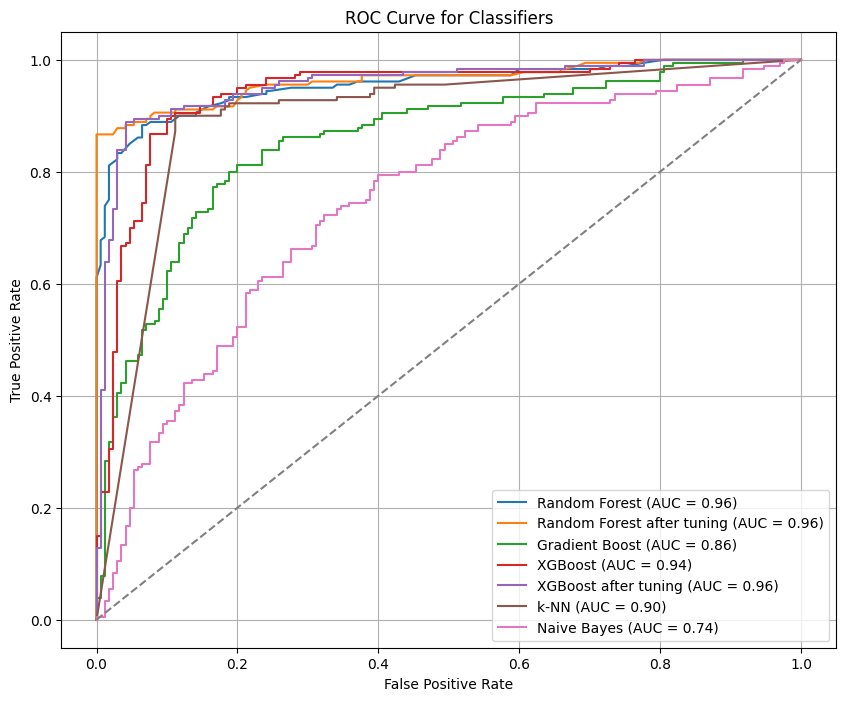

In [34]:
classifiers = {
    'Random Forest': rf,
    'Random Forest after tuning': best_rf,
    'Gradient Boost': gbc,
    'XGBoost': xgb,
    'XGBoost after tuning': best_xgb,
    'k-NN': best_knn_classifier,
    'Naive Bayes': nb_classifier
}

plt.figure(figsize=(10, 8))

for clf_name, clf in classifiers.items():
    y_prob = clf.predict_proba(X_test_)[:, 1]

    fpr, tpr, _ = roc_curve(y_test, y_prob)

    roc_auc = roc_auc_score(y_test, y_prob)

    plt.plot(fpr, tpr, label=f'{clf_name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Classifiers')
plt.legend(loc='lower right')
plt.grid(True)
plt.savefig('roc_curvesups.png', dpi=300)
plt.show()


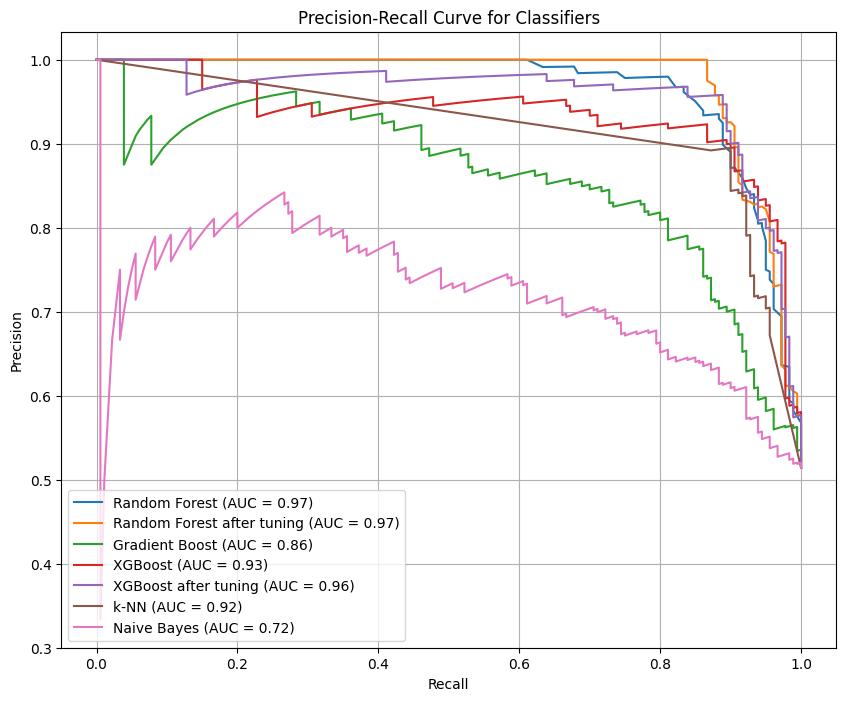

In [35]:
classifiers = {
    'Random Forest': rf,
    'Random Forest after tuning': best_rf,
    'Gradient Boost': gbc,
    'XGBoost': xgb,
    'XGBoost after tuning': best_xgb,
    'k-NN': best_knn_classifier,
    'Naive Bayes': nb_classifier
}

plt.figure(figsize=(10, 8))

for clf_name, clf in classifiers.items():
    y_prob = clf.predict_proba(X_test_)[:, 1]

    precision, recall, _ = precision_recall_curve(y_test, y_prob)

    pr_auc = auc(recall, precision)

    plt.plot(recall, precision, label=f'{clf_name} (AUC = {pr_auc:.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Classifiers')
plt.legend(loc='lower left')
plt.grid(True)
plt.savefig('precision_recall_curvesups.png', dpi=300)
plt.show()

In [36]:
models = ['Random Forest','Random Forest after tuning', 'Gradient Boosting', 'XGBoost','XGBoost after training','KNN Classifier','Naive Bias']

# Accuracy values
accuracies = [accuracy_rf,accuracy_rf_ht, accuracy_gbc, accuracy_xgb,accuracy_xgb_ht ,accuracy_knn, accuracy_nb]

# Precision values
precisions = [precision_rf, precision_rf_ht ,precision_gbc, precision_xgb, precision_xgb_ht , precision_knn,precision_nb]

# Recall values
recalls = [recall_rf, recall_rf_ht , recall_gbc, recall_xgb, recall_xgb_ht ,recall_knn,recall_nb]

# ROC AUC values
roc_aucs = [roc_auc_rf,roc_auc_rf_ht, roc_auc_gbc, roc_auc_xgb, roc_auc_xgb_ht ,roc_auc_knn,roc_auc_nb]

performance_df = pd.DataFrame({
    'Model': models,
    'Accuracy': accuracies,
    'Precision': precisions,
    'Recall': recalls,
    'ROC AUC':roc_aucs
})

performance_df.sort_values(by='Accuracy', ascending=False, inplace=True)

performance_df


,Model,Accuracy,Precision,Recall,ROC AUC
1,Random Forest after tuning,0.900000,0.900552,0.905556,0.899837
3,XGBoost,0.877143,0.854922,0.916667,0.875980
0,Random Forest,0.874286,0.846939,0.922222,0.872876
4,XGBoost after training,0.874286,0.850515,0.916667,0.873039
5,KNN Classifier,0.820000,0.769585,0.927778,0.816830
2,Gradient Boosting,0.800000,0.786458,0.838889,0.798856
6,Naive Bias,0.680000,0.695402,0.672222,0.680229


In [37]:
performance_df.to_excel('outputups.xlsx', index=False)

# 6. Conclusion and Remarks

 While addressing class imbalance through techniques like upsampling can improve accuracy, it also introduces potential risks of overfitting and data leakage.